Data Exploration and Visualization
========================

In [2]:
# Install missing packages
%pip install pandas numpy matplotlib seaborn scikit-learn optuna

#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Note: you may need to restart the kernel to use updated packages.


In [3]:
# configuration for plotting

sns.set_theme(style="darkgrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)


In [4]:
# Load the dataset

df = pd.read_csv("healthcare-dataset-stroke-data (2).csv")

In [5]:
# Display the first few rows of the dataset
print(f"Dataset shape: {df.shape}")
display(df.head())

Dataset shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# check for data types and information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Statistics summary of the dataset
display(df.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
# Check class distribution (stroke vs. no stroke)
print("\nStroke distribution:")
print(df['stroke'].value_counts())
print(f"Percentage of stroke cases: {df['stroke'].mean()*100:.2f}%")


Stroke distribution:
0    4861
1     249
Name: stroke, dtype: int64
Percentage of stroke cases: 4.87%


Feature Distribution Visualization
========================

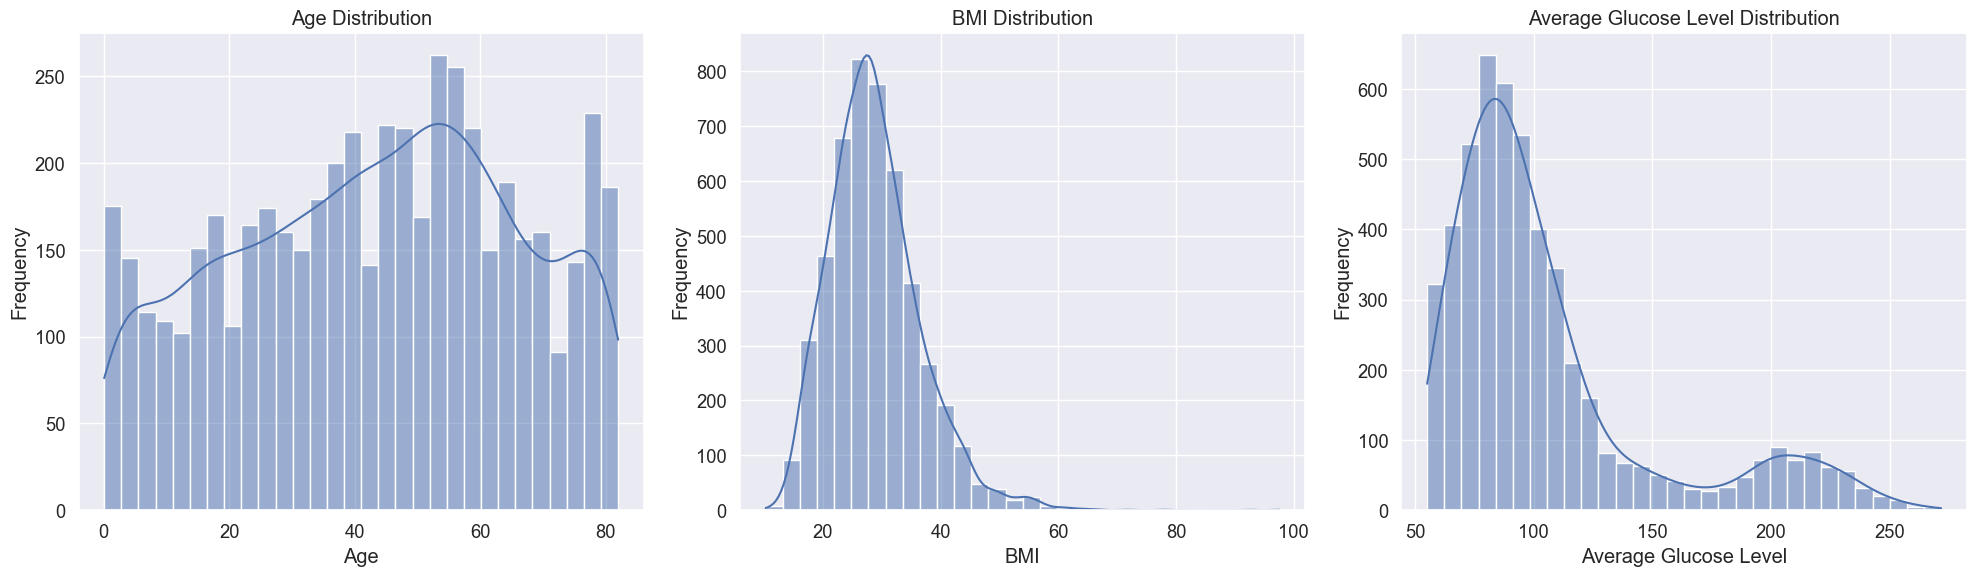

In [10]:
# Visualize the distribution of numerical features

fig, axes = plt.subplots(1, 3, figsize=(20, 6))


# Age distribution
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# bmi distribution
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Glucose level distribution
sns.histplot(df['avg_glucose_level'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Average Glucose Level Distribution')
axes[2].set_xlabel('Average Glucose Level')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


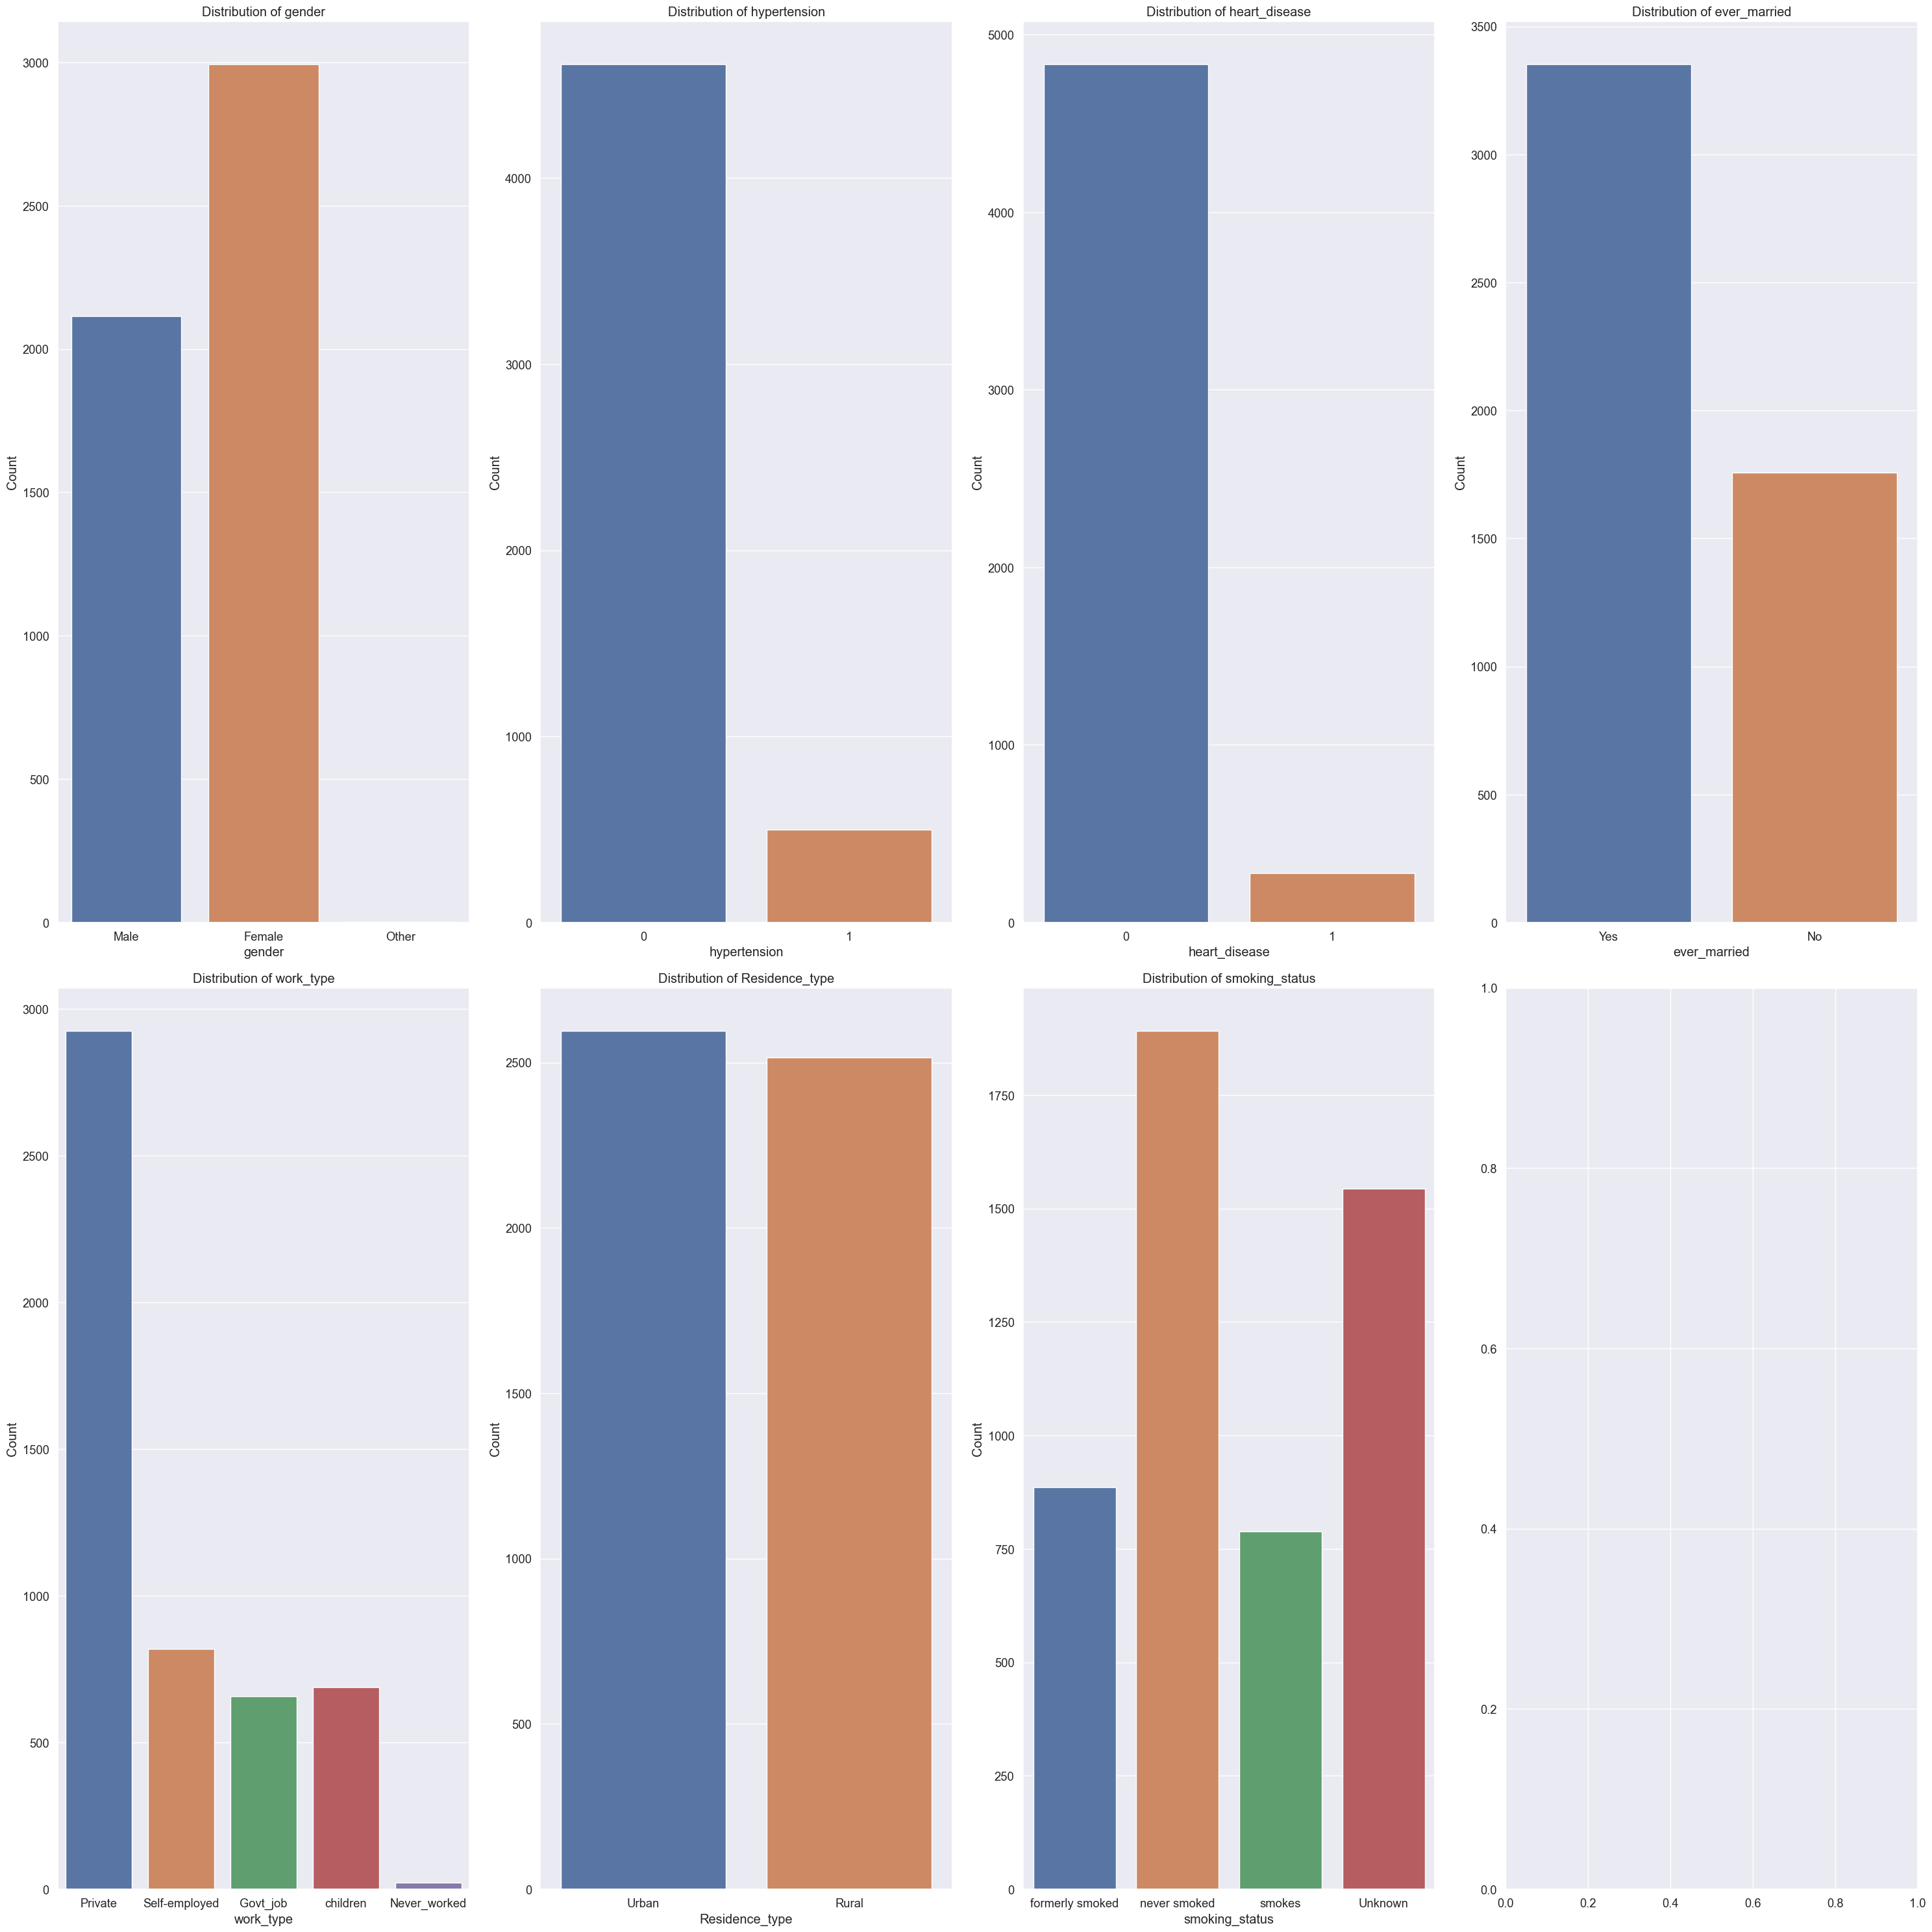

In [11]:
# Visualize the distribution of categorical features
# 2. Distribution of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                       'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 4, figsize=(30, 30))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()



Feature Relationships with Stroke Outcome
========================

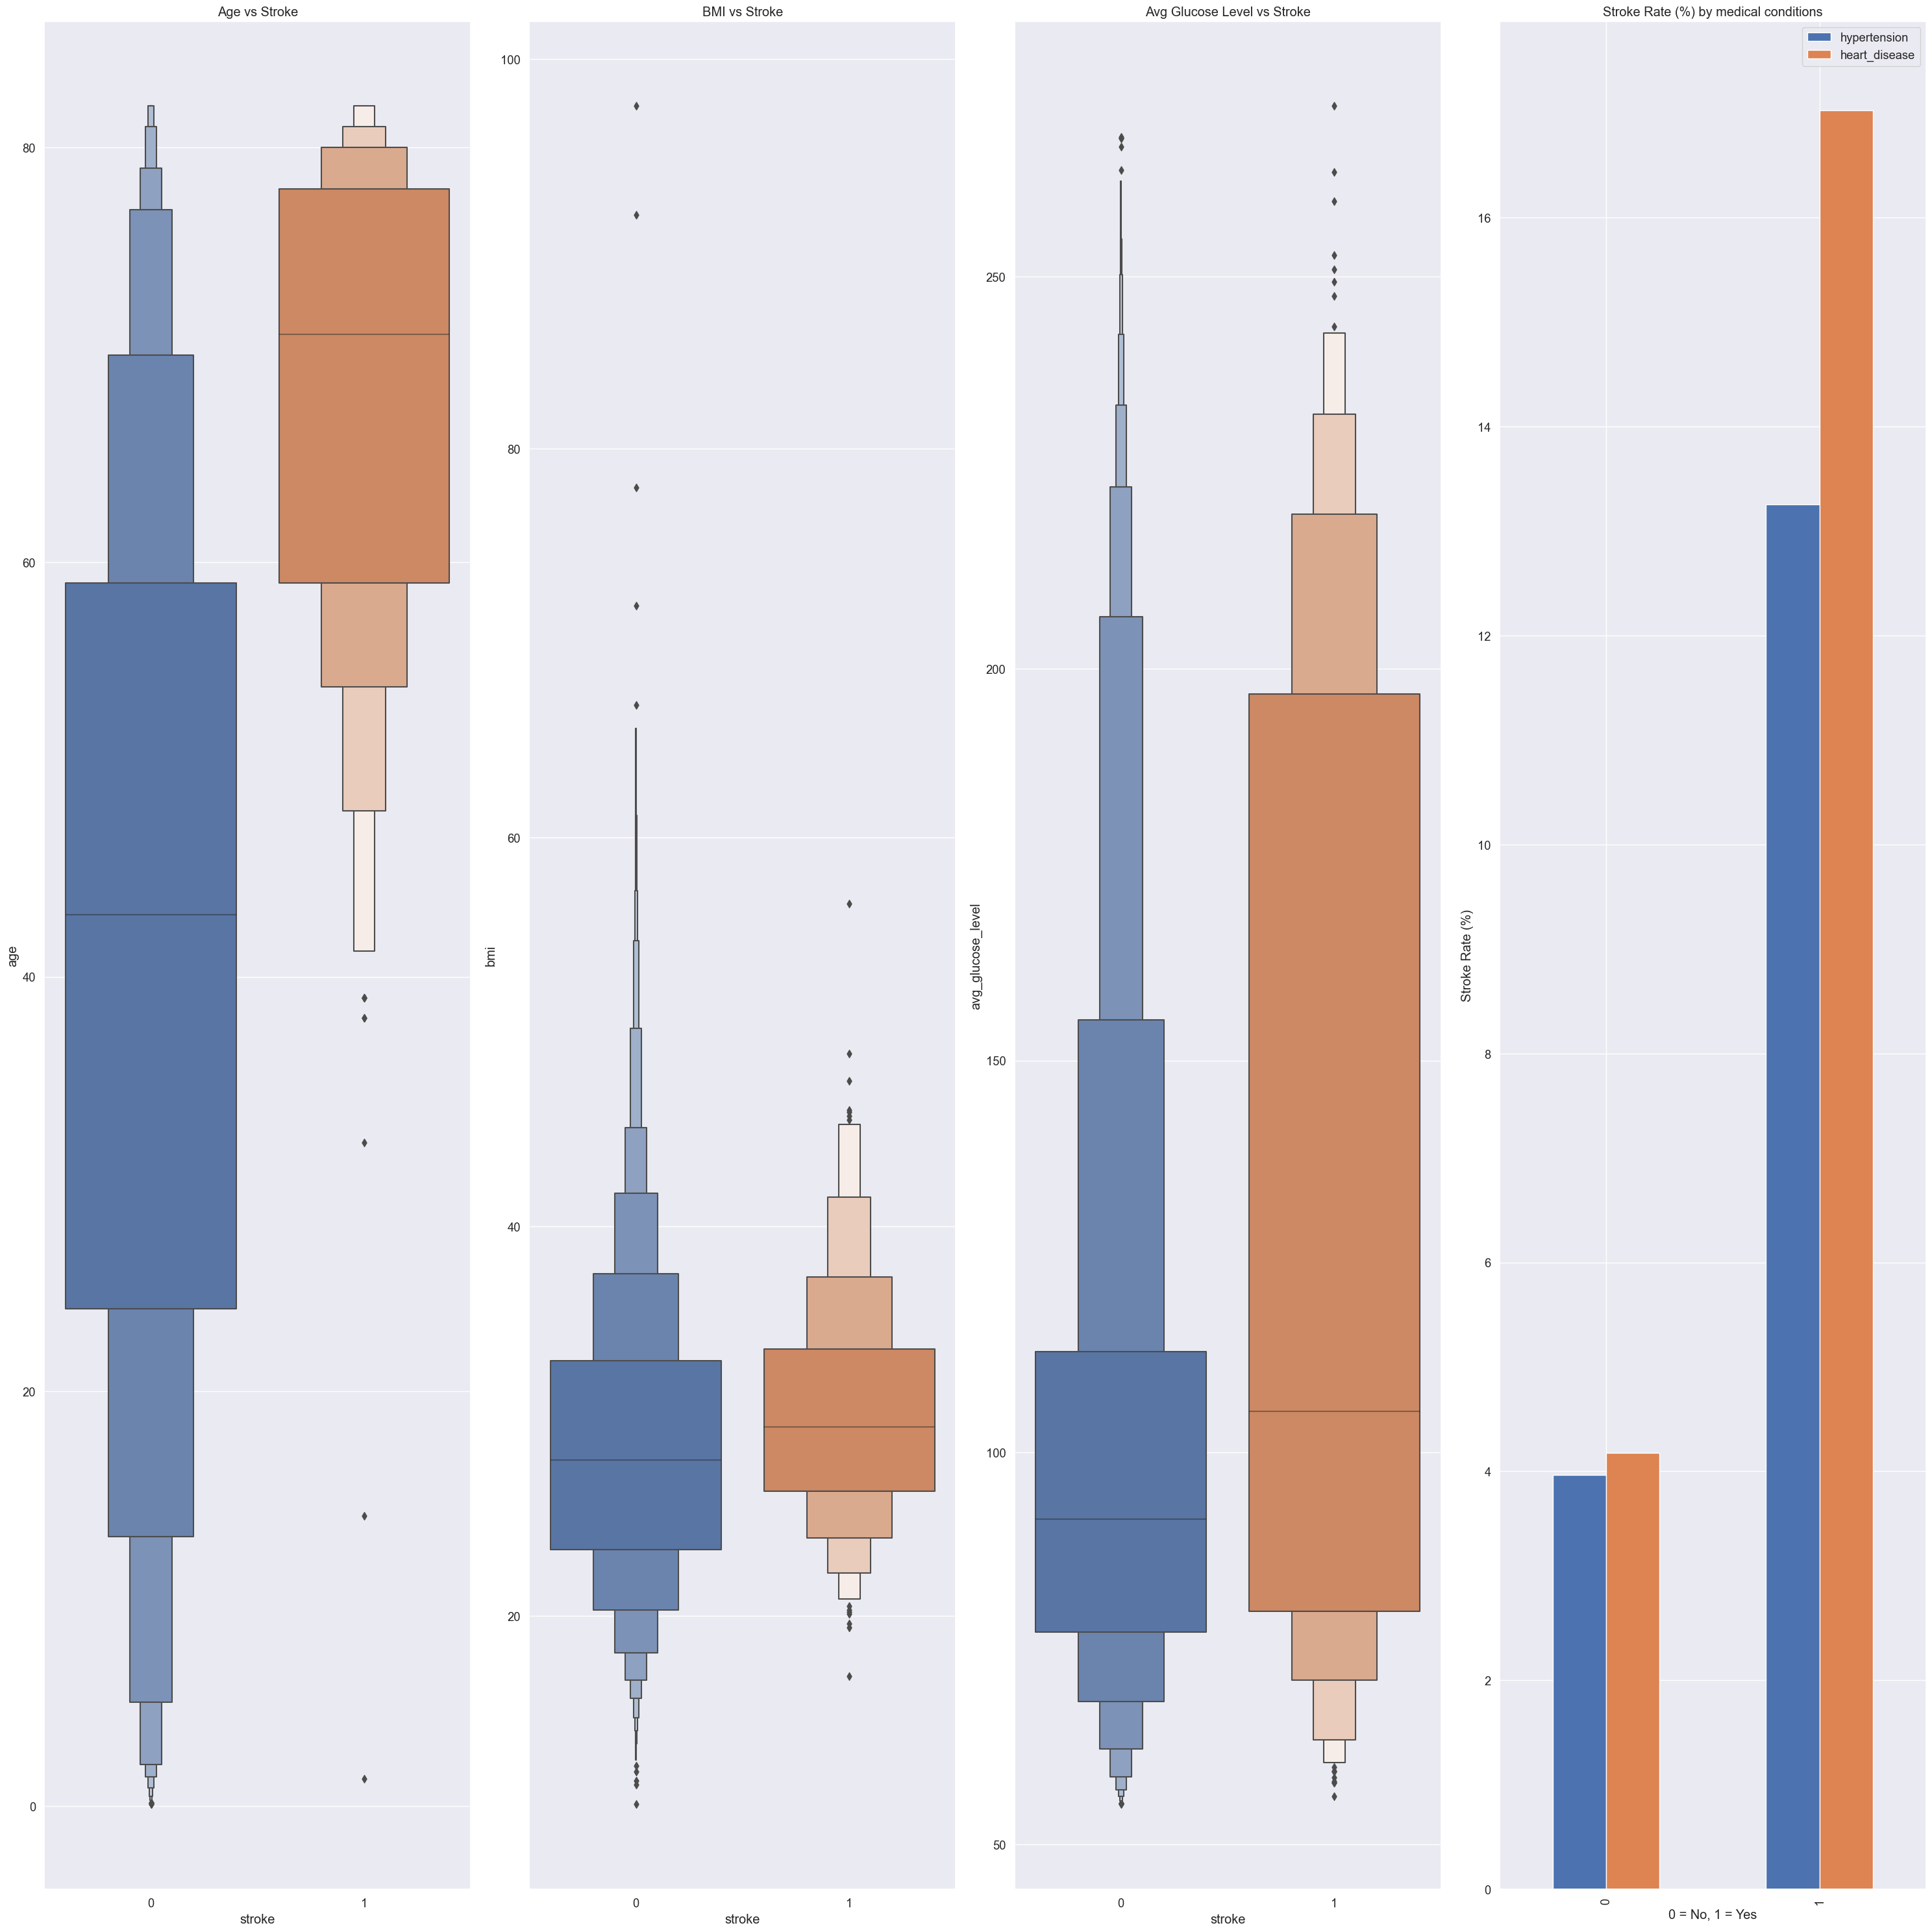

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(30, 30))
axes = axes.flatten()  # Flatten the 2D array to 1D

sns.boxenplot(x='stroke', y='age', data=df, ax=axes[0])
axes[0].set_title('Age vs Stroke')

sns.boxenplot(x='stroke', y='bmi', data=df, ax=axes[1])
axes[1].set_title('BMI vs Stroke')

sns.boxenplot(x='stroke', y='avg_glucose_level', data=df, ax=axes[2])
axes[2].set_title('Avg Glucose Level vs Stroke')


stroke_by_condition = pd.DataFrame({
    'hypertension': df.groupby('hypertension')['stroke'].mean(),
    'heart_disease': df.groupby('heart_disease')['stroke'].mean(),
}) * 100

stroke_by_condition.plot(kind='bar', ax=axes[3])
axes[3].set_title('Stroke Rate (%) by medical conditions')
axes[3].set_ylabel('Stroke Rate (%)')
axes[3].set_xlabel('0 = No, 1 = Yes')



plt.tight_layout()
plt.show()

Correlation Matrix
========================


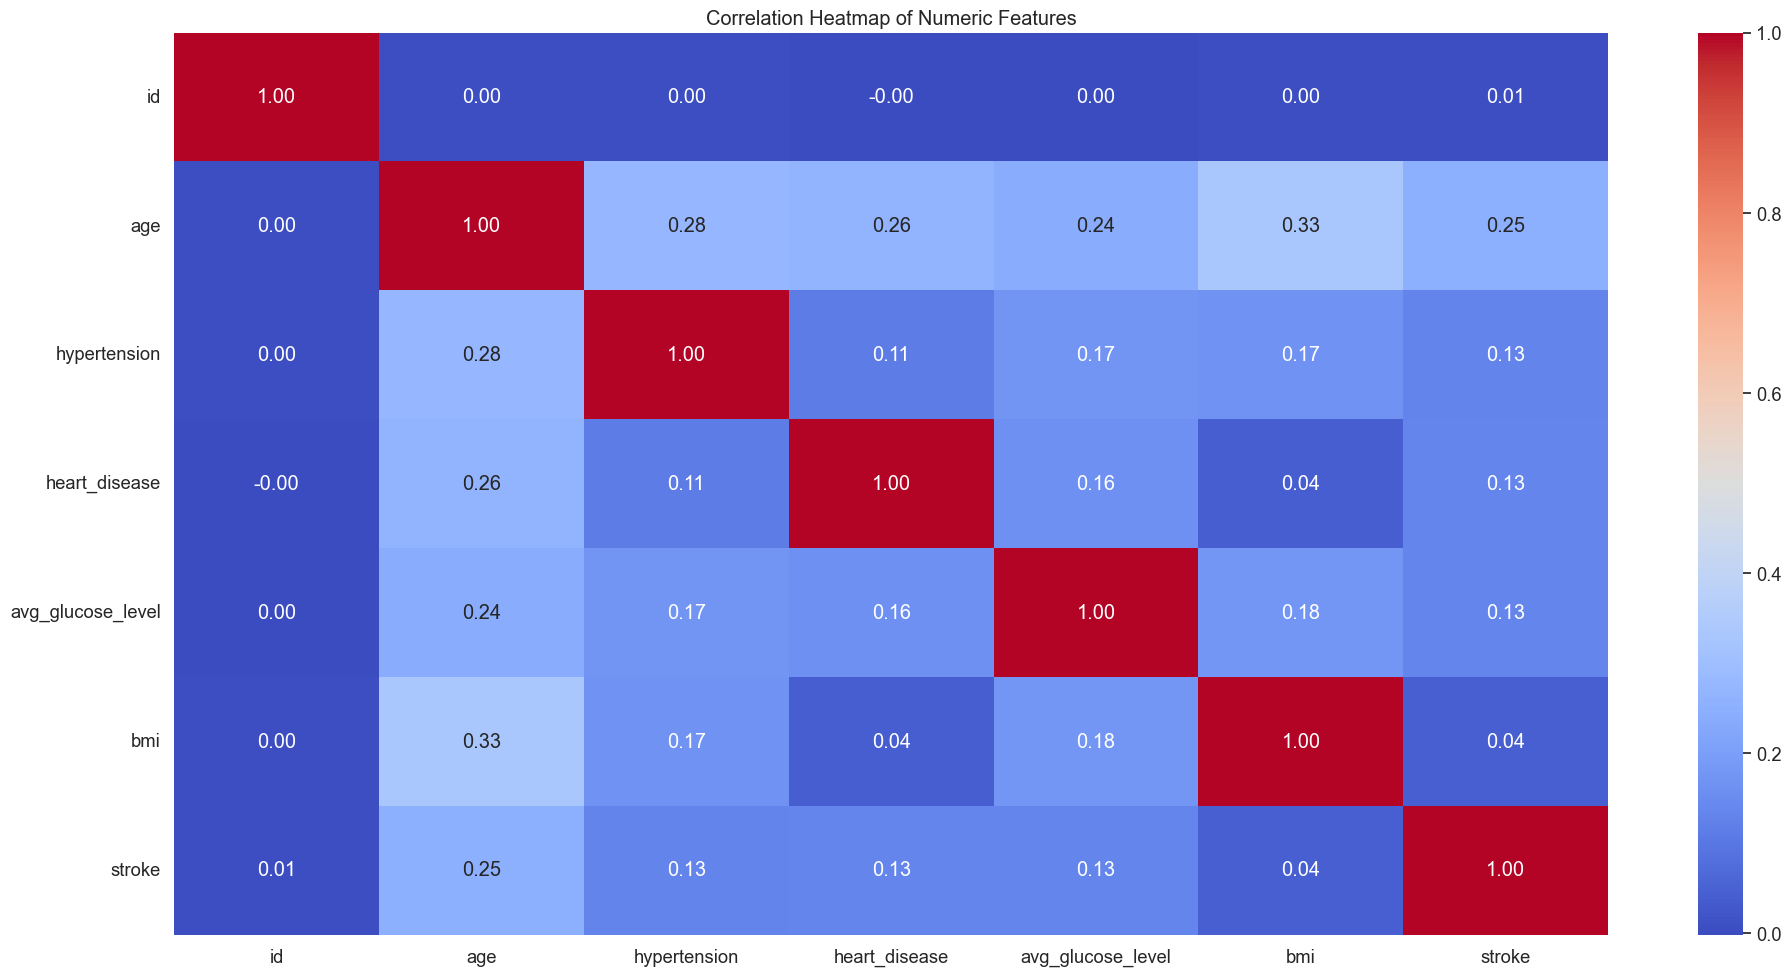

In [13]:
plt.figure(figsize=(20, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


Dimensionality Reduction
========================

In [14]:
# Target variable

y = df['stroke']

In [15]:
# Dropping unnecessary columns

numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(['id', 'stroke'], axis=1, errors='ignore')
numeric_features = numeric_features.fillna(numeric_features.mean())

print(f"X shape: {numeric_features.shape}")
display(numeric_features.head())


X shape: (5110, 5)


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.600000
1,61.0,0,0,202.21,28.893237
2,80.0,0,1,105.92,32.500000
3,49.0,0,0,171.23,34.400000
4,79.0,1,0,174.12,24.000000


In [16]:
# Scaling the numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

print(f"X shape after scaling: {numeric_features_scaled.shape}")
display(pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns).head())


X shape after scaling: (5110, 5)


,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.051434,-0.328602,4.185032,2.706375,1.001234e+00
1,0.786070,-0.328602,-0.238947,2.121559,4.615554e-16
2,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01
3,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01
4,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01


In [17]:
# Perform PCA to reduce dimensionality after scaling

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
numeric_features_pca = pca.fit_transform(numeric_features_scaled)

print(f"PCA shape: {numeric_features_pca.shape}")
display(pd.DataFrame(numeric_features_pca, columns=['PC1', 'PC2']).head())



PCA shape: (5110, 2)


,PC1,PC2
0,3.533389,-3.032898
1,1.130652,-0.092992
2,2.473164,-3.019433
3,0.841577,0.398333
4,2.486429,0.125535


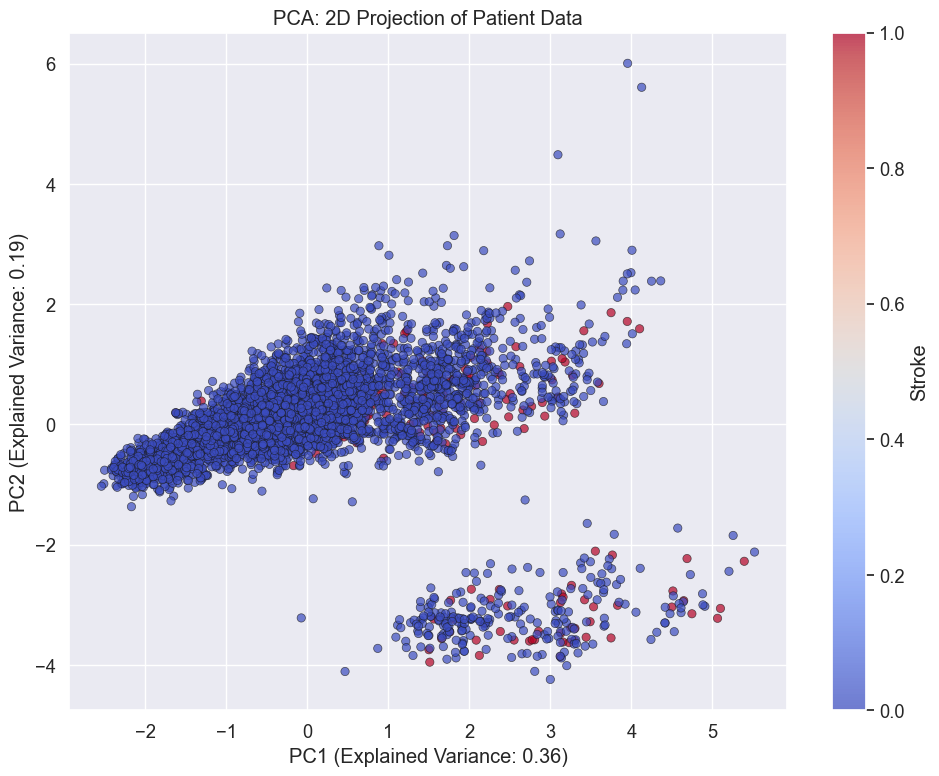

In [18]:
# Visualize PCA results in 2D for numeric features only

plt.figure(figsize=(10, 8))
scatter = plt.scatter(numeric_features_pca[:, 0], numeric_features_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(scatter, label='Stroke')
plt.title('PCA: 2D Projection of Patient Data')
plt.xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')


plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()

In [19]:
# Categorical features 

categorical_features = df.select_dtypes(include=['object'])

# Display the first few rows of categorical features
print(f"Categorical features shape: {categorical_features.shape}")
display(categorical_features.head())

for col in categorical_features.columns:
    # Get the most frequent value
    most_frequent = categorical_features[col].mode()[0]
    # Fill NaN values with the most frequent value
    categorical_features[col] = categorical_features[col].fillna(most_frequent)


Categorical features shape: (5110, 5)


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [20]:

# One-hot encoding for as label encoding is worse for pca
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder - use sparse_output=False to get a dense matrix
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Get the categorical feature names
categorical_features = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
encoded_features = pd.DataFrame(
    encoder.fit_transform(df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features)
)

# Display the first few rows of encoded features
print(f"Encoded features shape: {encoded_features.shape}")
display(encoded_features.head())

Encoded features shape: (5110, 16)


,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Reset index to ensure proper concatenation
numeric_features_reset = numeric_features.reset_index(drop=True)
encoded_features_reset = encoded_features.reset_index(drop=True)

X_combined = pd.concat([numeric_features_reset, encoded_features_reset], axis=1)
print(f"Combined features shape: {X_combined.shape}")
display(X_combined.head())

Combined features shape: (5110, 21)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.893237,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


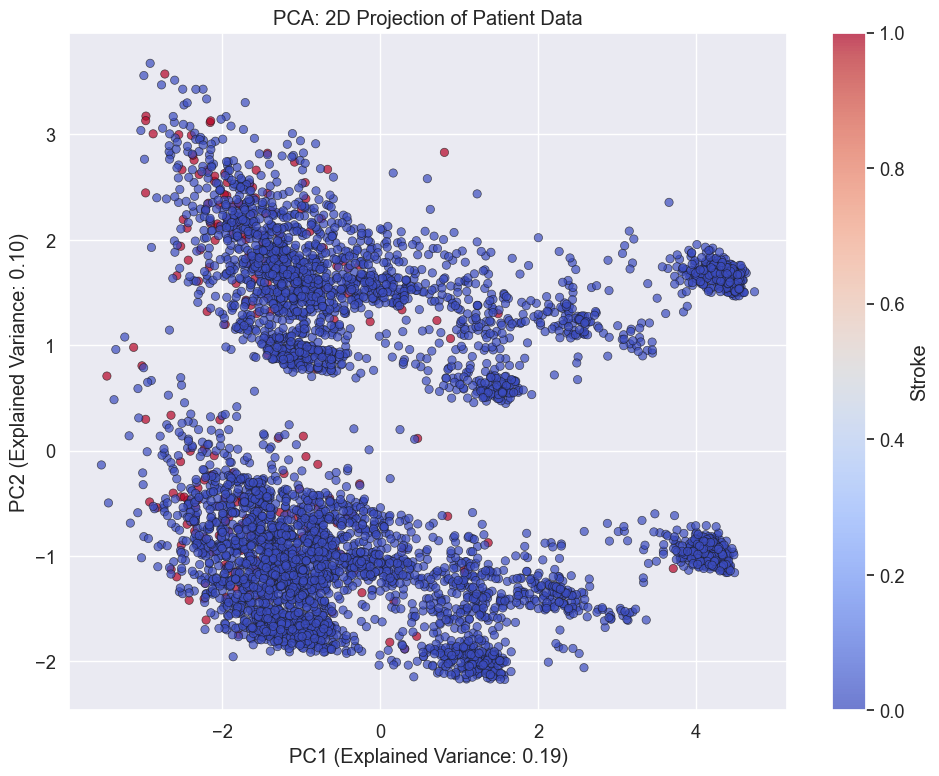

In [22]:
# Scaling the combined features

X_combined_scaled = scaler.fit_transform(X_combined)

X_combined_pca = pca.fit_transform(X_combined_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(scatter, label='Stroke')
plt.title('PCA: 2D Projection of Patient Data')
plt.xlabel(f'PC1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')

plt.tight_layout()
plt.savefig('pca_visualization.png')
plt.show()

Linear Discriminant  Analysis
=============================

Explained variance ratio: [1.]


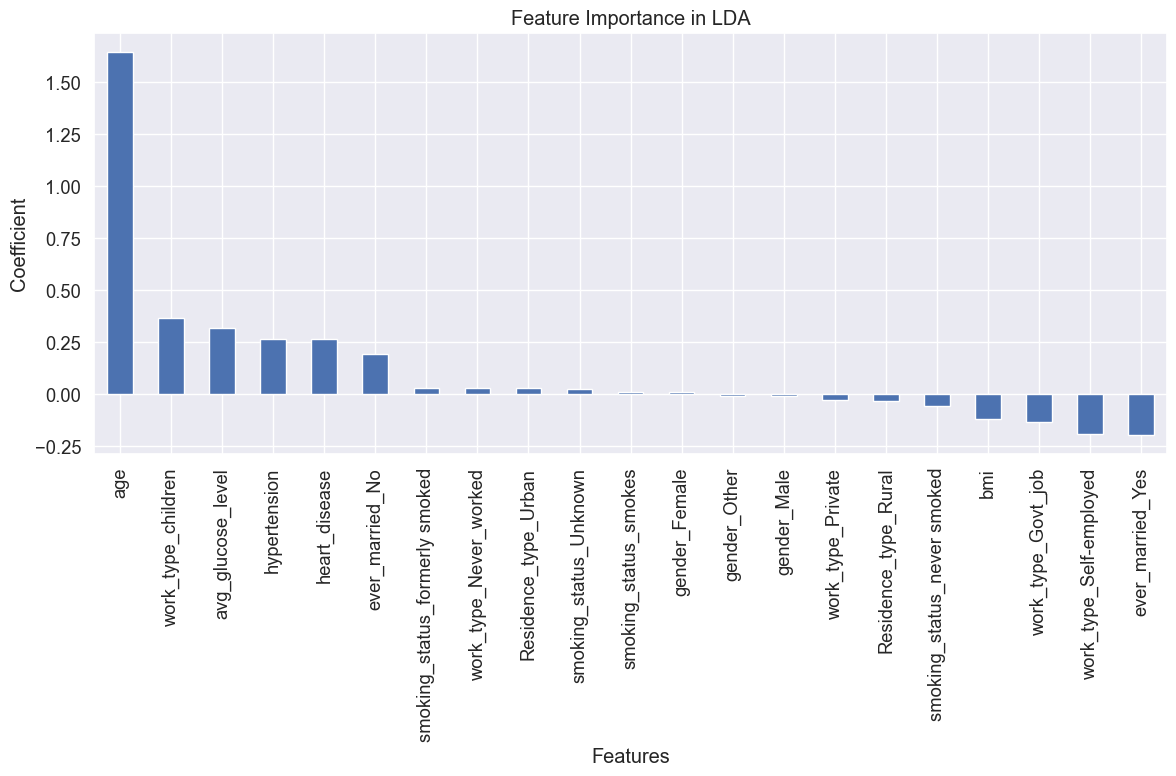

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  
X_lda = lda.fit_transform(X_combined_scaled, y)

print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

coef = pd.DataFrame(
    lda.coef_,
    columns=X_combined.columns,
    index=['LD1']
).T

# Sort and plot feature importance
plt.figure(figsize=(12, 8))
coef['LD1'].sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance in LDA')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

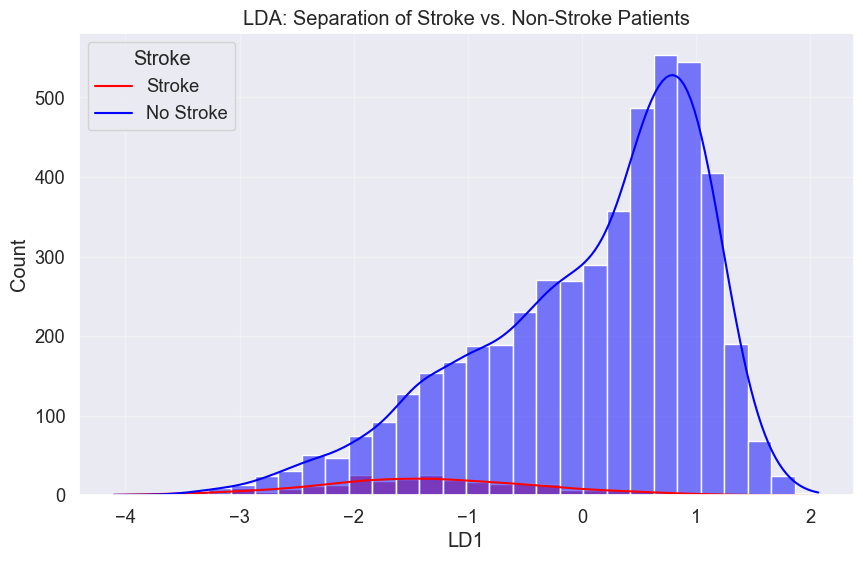

In [24]:
lda_df = pd.DataFrame(data=X_lda, columns=['LD1'])
lda_df['stroke'] = df['stroke'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=lda_df, x='LD1', hue='stroke', bins=30, kde=True, palette={0:'blue', 1:'red'})
plt.title('LDA: Separation of Stroke vs. Non-Stroke Patients')
plt.xlabel('LD1')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['Stroke', 'No Stroke'])
plt.grid(alpha=0.3)
plt.show()

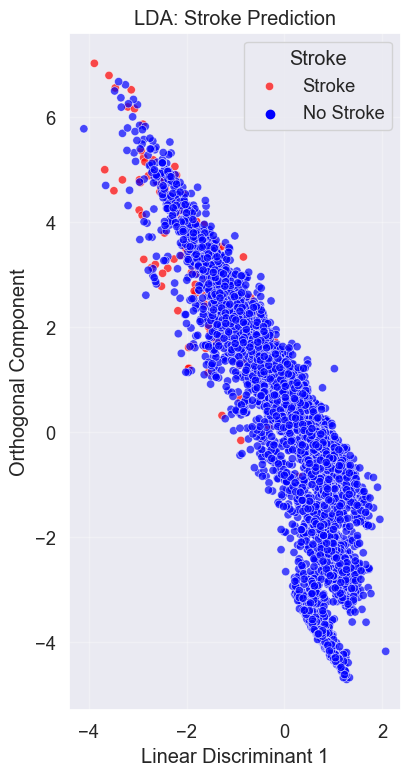

In [25]:
# using orthogonal components to visualize the lda in 2D

lda_direction = lda.coef_[0]
lda_direction = lda_direction / np.linalg.norm(lda_direction)

X_orthogonal = X_combined_scaled - np.outer(X_lda.flatten(), lda_direction)

pca_orthogonal = PCA(n_components=1)
X_lda_2d = pca_orthogonal.fit_transform(X_orthogonal)

X_lda_2d = np.column_stack((X_lda, X_lda_2d))

# Create LDA DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda_2d, columns=['LD1', 'LD2'])
lda_df['stroke'] = df['stroke'].reset_index(drop=True)

# Plot LDA
plt.subplot(1, 3, 2)
sns.scatterplot(x='LD1', y='LD2', hue='stroke', data=lda_df, palette={0:'blue', 1:'red'}, alpha=0.7)
plt.title('LDA: Stroke Prediction')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Orthogonal Component')
plt.legend(title='Stroke', labels=['Stroke', 'No Stroke'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('lda_visualization.png')
plt.show()

t-Distributed Stochastic Neighbor Embedding
===========================================

In [26]:
# t-SNE setup for visualization

# we chose 30 for perplexity as it is a good default value for most datasets.

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,          # 2D visualization
    perplexity=30,           # Balance between local and global structure (try 5-50)
    learning_rate='auto',    # Auto learning rate based on dataset size
    n_iter=1000,         # Number of iterations
    random_state=42          # For reproducibility
)




In [27]:
# t-SNE fit and transform

X_tsne = tsne.fit_transform(X_combined_scaled)

tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['stroke'] = df['stroke'].reset_index(drop=True)

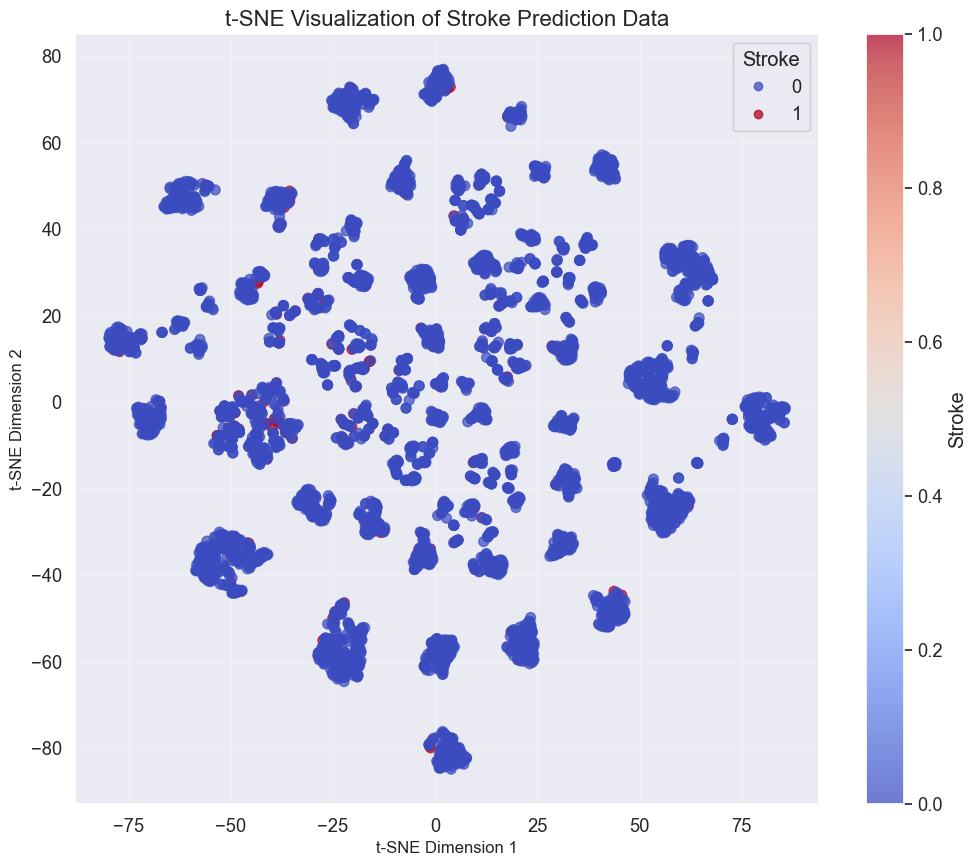

In [28]:
# Visualize t-SNE results
plt.figure(figsize=(12, 10))

# Main scatter plot
scatter = plt.scatter(
    x='t-SNE1', 
    y='t-SNE2', 
    c=tsne_df['stroke'],
    cmap='coolwarm',
    alpha=0.7,
    s=50,
    data=tsne_df
)

# Add legend
legend1 = plt.legend(*scatter.legend_elements(),title="Stroke")
plt.gca().add_artist(legend1)

# Add labels and title
plt.title('t-SNE Visualization of Stroke Prediction Data', fontsize=16)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(alpha=0.3)

# Add colorbar
plt.colorbar(scatter, label='Stroke')
plt.savefig('tsne_visualization.png')
plt.show()

Data Analysis
=============

In [29]:
# show me count of every value in every categorical column.
data = df.select_dtypes(include=['object'])

print("\nCount of each value in every categorical column:")
for col in data.columns:
    print(f"\n{col}:")
    print(data[col].value_counts())




Count of each value in every categorical column:

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [30]:
# Drop the single row with other in gender

data = df[df['gender'] != 'Other'].reset_index(drop=True)
df = data

In [31]:
# check if a child has a stroke
print("\nCount of children with stroke:")
print(data[data['age'] < 18]['stroke'].value_counts())

# check if row with children in work type has stroke.
print("\nCount of children with stroke in work type:")
print(data[(data['work_type'] == 'children')]['stroke'].value_counts())



Count of children with stroke:
0    854
1      2
Name: stroke, dtype: int64

Count of children with stroke in work type:
0    685
1      2
Name: stroke, dtype: int64


In [32]:
# select hypertension column
hypertension = df[['hypertension']]
print(hypertension.value_counts())

# select heart disease column
heart_disease = df[['heart_disease']]
print(heart_disease.value_counts())


hypertension
0               4611
1                498
dtype: int64
heart_disease
0                4833
1                 276
dtype: int64


In [33]:
# Use standard deviation to identify outliers in BMI
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()

# Define boundaries for outliers (typically ±3 standard deviations from the mean)
lower_bound = mean_bmi - 3 * std_bmi
upper_bound = mean_bmi + 3 * std_bmi

# Filter outliers
bmi_std_outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)].reset_index(drop=True)

print("\nOutliers in BMI column using 3 standard deviations:")
print(f"Mean BMI: {mean_bmi:.2f}, Standard Deviation: {std_bmi:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(bmi_std_outliers)}")

# Display outliers with stroke status
print("\nOutliers in BMI with stroke status:")
print(bmi_std_outliers[['bmi', 'stroke']])


Outliers in BMI column using 3 standard deviations:
Mean BMI: 28.89, Standard Deviation: 7.85
Lower bound: 5.33, Upper bound: 52.46
Number of outliers: 58

Outliers in BMI with stroke status:
     bmi  stroke
0   56.6       1
1   54.6       0
2   60.9       0
3   54.7       0
4   64.8       0
5   54.7       0
6   60.2       0
7   71.9       0
8   54.6       0
9   55.7       0
10  55.7       0
11  57.5       0
12  54.2       0
13  78.0       0
14  53.4       0
15  55.2       0
16  55.0       0
17  54.8       0
18  52.8       0
19  66.8       0
20  55.1       0
21  55.9       0
22  57.3       0
23  56.0       0
24  57.7       0
25  54.0       0
26  56.1       0
27  97.6       0
28  53.9       0
29  53.8       0
30  52.7       0
31  52.8       0
32  55.7       0
33  53.5       0
34  63.3       0
35  52.8       0
36  61.2       0
37  58.1       0
38  52.7       0
39  53.4       0
40  59.7       0
41  52.5       0
42  52.9       0
43  54.7       0
44  61.6       0
45  53.8       0
46  54.3

In [34]:
# Use standard deviation to identify outliers in glucose
mean_glucose = df['avg_glucose_level'].mean()
std_glucose = df['avg_glucose_level'].std()

# Define boundaries for outliers (typically ±3 standard deviations from the mean)
lower_bound_glucose = max(mean_glucose - 3 * std_glucose,0)
upper_bound_glucose = mean_glucose + 3 * std_glucose

# Filter outliers
glucose_std_outliers = df[(df['avg_glucose_level'] < lower_bound_glucose) | (df['avg_glucose_level'] > upper_bound_glucose)].reset_index(drop=True)

print("\nOutliers in avg_glucose_level column using 3 standard deviations:")
print(f"Mean avg_glucose_level: {mean_glucose:.2f}, Standard Deviation: {std_glucose:.2f}")
print(f"Lower bound: {lower_bound_glucose:.2f}, Upper bound: {upper_bound_glucose:.2f}")
print(f"Number of outliers: {len(glucose_std_outliers)}")
display(glucose_std_outliers.head())


Outliers in avg_glucose_level column using 3 standard deviations:
Mean avg_glucose_level: 106.14, Standard Deviation: 45.29
Lower bound: 0.00, Upper bound: 242.00
Number of outliers: 49


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,54401,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
1,19824,Male,76.0,1,0,Yes,Private,Rural,243.58,33.6,never smoked,1
2,13491,Male,80.0,0,0,Yes,Private,Rural,259.63,31.7,smokes,1
3,44033,Male,56.0,1,0,Yes,Private,Rural,249.31,35.8,never smoked,1
4,71279,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.7,never smoked,1


In [35]:
# We will drop the bmi outliers and keep the glucose outliers as glucose is a very important factor in stroke prediction.

# Drop the outliers from the original dataframe
df_cleaned = df[~df.index.isin(bmi_std_outliers.index)].reset_index(drop=True)
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Cleaned dataset shape: (5051, 12)


In [36]:
# calc the mean of bmi for each type rescidence type.
residence_bmi = df_cleaned.groupby('Residence_type')['bmi'].mean()
print("\nMean BMI for each Residence type:")  
print(residence_bmi)

# replace the missing values with the mean of the respective residence type.
for residence in df_cleaned['Residence_type'].unique():
    mean_bmi = df_cleaned[df_cleaned['Residence_type'] == residence]['bmi'].mean()
    df_cleaned.loc[(df_cleaned['Residence_type'] == residence) & (df_cleaned['bmi'].isnull()), 'bmi'] = mean_bmi

# check if there are any missing values in the dataset after replacing the missing values.
print("\nMissing values in each column after replacing missing values:")
print(df_cleaned.isnull().sum())



Mean BMI for each Residence type:
Residence_type
Rural    28.890280
Urban    28.872982
Name: bmi, dtype: float64

Missing values in each column after replacing missing values:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [37]:
# display the percentage of people who smoke or never or formely for each work type.
smoking_status = df_cleaned.groupby('work_type')['smoking_status'].value_counts(normalize=True).unstack().fillna(0) * 100
smoking_status = smoking_status.rename(columns={
    'formerly smoked': 'Formerly Smoked',
    'never smoked': 'Never Smoked',
    'smokes': 'Smokes'
})
print("\nPercentage of smoking status for each work type:")
display(smoking_status)


Percentage of smoking status for each work type:


smoking_status,Unknown,Formerly Smoked,Never Smoked,Smokes
work_type,,,,
Govt_job,18.586790,20.430108,43.010753,17.972350
Never_worked,36.363636,0.000000,63.636364,0.000000
Private,21.914008,17.891817,41.608877,18.585298
Self-employed,19.206939,25.650558,39.900867,15.241636
children,89.956332,1.892285,7.860262,0.291121


In [38]:
# show me how many unknown in smoking status before edit.
print("\nCount of unknown smoking status before edit:")
print(df_cleaned['smoking_status'].value_counts())


# for all children with unknown smoking status, we will replace it with never smoked.
df_cleaned.loc[(df_cleaned['work_type'] == 'children') & (df_cleaned['smoking_status'] == "Unknown"), 'smoking_status'] = 'never smoked'

# show me how many unknown in smoking status after edit.
print("\nCount of unknown smoking status after edit:")
print(df_cleaned['smoking_status'].value_counts())


Count of unknown smoking status before edit:
never smoked       1870
Unknown            1534
formerly smoked     869
smokes              778
Name: smoking_status, dtype: int64

Count of unknown smoking status after edit:
never smoked       2488
Unknown             916
formerly smoked     869
smokes              778
Name: smoking_status, dtype: int64


In [39]:
# show me percentage of having stroke while unknown smoking.

unknown_smoking = df_cleaned[df_cleaned['stroke'] == 1]
unknown_smoking_stroke = unknown_smoking['smoking_status'].value_counts(normalize=True) * 100
print("\nPercentage of stroke for unknown smoking status:")
print(unknown_smoking_stroke)




Percentage of stroke for unknown smoking status:
never smoked       36.649215
formerly smoked    28.795812
Unknown            18.324607
smokes             16.230366
Name: smoking_status, dtype: float64


In [40]:
# encode gender, ever_married, residence_type into 0 and 1.
df_cleaned = df_cleaned.replace({'gender': {'Male': 1, 'Female': 0}, 'ever_married': {'Yes': 1, 'No': 0}, 'Residence_type': {'Urban': 1, 'Rural': 0}})

# encode work_type using one hot encoding from sklearn.
work_type_dummies = pd.get_dummies(df_cleaned['work_type'], prefix='work_type', drop_first=True)
df_cleaned = pd.concat([df_cleaned, work_type_dummies], axis=1)

# drop work_type column from the original dataframe.
df_cleaned = df_cleaned.drop('work_type', axis=1)

# encode smoking_status using label encoding.
df_cleaned = df_cleaned.replace({'smoking_status': {'Unknown': 1, 'never smoked': 0, 'smokes': 3, 'formerly smoked': 2}})


display(df_cleaned.head())


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,58631,1,73.0,1,0,1,1,194.99,32.8,0,1,0,0,1,0
1,5111,0,54.0,1,0,1,1,180.93,27.7,0,1,0,0,0,0
2,10710,0,56.0,0,0,1,1,185.17,40.4,2,1,0,1,0,0
3,55927,0,80.0,1,0,1,0,74.90,22.2,0,1,0,1,0,0
4,65842,0,67.0,1,0,1,0,61.94,25.3,3,1,0,0,1,0


Splitting Data into training, validation and testing
====================================================

In [41]:
# remove the stroke column from the dataset and place it into y.
y = df_cleaned['stroke']
X = df_cleaned.drop('stroke', axis=1)
X = X.drop('id', axis=1)

# check the shape of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# check the first few rows of X and y
display(X.head())
display(y.head())

X shape: (5051, 13)
y shape: (5051,)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,73.0,1,0,1,1,194.99,32.8,0,0,0,1,0
1,0,54.0,1,0,1,1,180.93,27.7,0,0,0,0,0
2,0,56.0,0,0,1,1,185.17,40.4,2,0,1,0,0
3,0,80.0,1,0,1,0,74.90,22.2,0,0,1,0,0
4,0,67.0,1,0,1,0,61.94,25.3,3,0,0,1,0


0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [42]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# check the first few rows of X_train and y_train
display(X_train.head())
display(y_train.head())

X_train shape: (4040, 13)
X_test shape: (1011, 13)
y_train shape: (4040,)
y_test shape: (1011,)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,52.0,0,0,1,1,86.85,23.8,2,0,1,0,0
1,1,56.0,1,0,1,0,249.31,35.8,0,0,1,0,0
2,0,11.0,0,0,0,1,69.68,14.4,0,0,0,0,1
3,0,79.0,0,0,0,1,74.36,39.2,1,0,0,1,0
4,1,54.0,0,0,1,0,109.51,29.0,0,0,1,0,0


0    0
1    1
2    0
3    0
4    0
Name: stroke, dtype: int64

In [43]:
# split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

# check the first few rows of X_train and y_train
display(X_train.head())
display(y_train.head())

# check the first few rows of X_val and y_val
display(X_val.head())
display(y_val.head())

X_train shape: (3232, 13)
X_val shape: (808, 13)
y_train shape: (3232,)
y_val shape: (808,)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,57.0,0,0,1,0,84.79,32.8,2,0,0,1,0
1,0,32.0,0,0,1,0,85.62,46.1,3,0,1,0,0
2,0,21.0,0,0,0,0,89.44,21.9,3,0,1,0,0
3,0,56.0,0,0,1,0,222.60,40.1,3,0,1,0,0
4,1,16.0,0,0,0,0,78.48,22.6,0,0,0,0,0


0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,24.0,0,0,0,1,84.16,37.5,3,0,1,0,0
1,0,22.0,0,0,0,0,62.81,21.3,0,0,1,0,0
2,1,13.0,0,0,0,0,55.39,23.2,0,0,0,0,1
3,0,25.0,0,0,1,0,90.65,20.9,1,0,1,0,0
4,0,5.0,0,0,0,1,84.91,26.1,0,0,0,0,1


0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

Scaling Non-Binary Numeric features before training
===================================================

In [44]:
# use standard scaler to scale only numeric features in the training set.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = X_train[['bmi', 'age', 'avg_glucose_level']].reset_index(drop=True)
X_train_scaled = scaler.fit_transform(features_to_scale)

# join the scaled features with the rest of the features
X_train_final = pd.concat([X_train.drop(columns=['bmi', 'age', 'avg_glucose_level']), 
                            pd.DataFrame(X_train_scaled, columns=['bmi_scaled', 'age_scaled', 'avg_glucose_level_scaled'])], 
                           axis=1)


print(X_train_final.shape)
display(X_train_final.head())




(3232, 13)


,gender,hypertension,heart_disease,ever_married,Residence_type,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,bmi_scaled,age_scaled,avg_glucose_level_scaled
0,1,0,0,1,0,2,0,0,1,0,0.499139,0.606501,-0.467692
1,0,0,0,1,0,3,0,1,0,0,2.202307,-0.494520,-0.448909
2,0,0,0,0,0,3,0,1,0,0,-0.896691,-0.978970,-0.362462
3,0,0,0,1,0,3,0,1,0,0,1.433960,0.562460,2.650939
4,1,0,0,0,0,0,0,0,0,0,-0.807050,-1.199174,-0.610486


In [45]:
# scale the validation set using the same scaler as the training set

features_to_scale = X_val[['bmi', 'age', 'avg_glucose_level']].reset_index(drop=True)
X_val_scaled = scaler.transform(features_to_scale)

# join the scaled features with the rest of the features
X_val_final = pd.concat([X_val.drop(columns=['bmi', 'age', 'avg_glucose_level']), 
                          pd.DataFrame(X_val_scaled, columns=['bmi_scaled', 'age_scaled', 'avg_glucose_level_scaled'])], 
                         axis=1)

print(X_val_final.shape)
display(X_val_final.head())



(808, 13)


,gender,hypertension,heart_disease,ever_married,Residence_type,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,bmi_scaled,age_scaled,avg_glucose_level_scaled
0,1,0,0,0,1,3,0,1,0,0,1.101010,-0.846847,-0.481948
1,0,0,0,0,0,0,0,1,0,0,-0.973525,-0.934929,-0.965097
2,1,0,0,0,0,0,0,0,0,1,-0.730216,-1.331296,-1.133012
3,0,0,0,1,0,1,0,1,0,0,-1.024748,-0.802806,-0.335080
4,0,0,0,0,1,0,0,0,0,1,-0.358848,-1.683623,-0.464976


In [46]:
# scale the test set

features_to_scale = X_test[['bmi', 'age', 'avg_glucose_level']].reset_index(drop=True)
X_test_scaled = scaler.transform(features_to_scale)

# join the scaled features with the rest of the features
X_test_final = pd.concat([X_test.drop(columns=['bmi', 'age', 'avg_glucose_level']), 
                          pd.DataFrame(X_test_scaled, columns=['bmi_scaled', 'age_scaled', 'avg_glucose_level_scaled'])], 
                         axis=1)

print(X_test_final.shape)
display(X_test_final.head())


(1011, 13)


,gender,hypertension,heart_disease,ever_married,Residence_type,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,bmi_scaled,age_scaled,avg_glucose_level_scaled
0,1,1,0,1,1,0,0,1,0,0,1.113816,1.090950,-0.212652
1,0,0,0,0,1,1,0,1,0,0,-0.922302,-1.243215,-0.649184
2,1,0,0,1,0,3,0,1,0,0,0.473527,-0.362398,0.898930
3,0,0,0,1,1,2,0,0,0,0,1.805328,0.518419,-0.761881
4,1,0,0,1,0,2,0,1,0,0,-0.333237,1.046909,0.178393


In [47]:
X_train_final=X_train
X_val_final=X_val
X_test_final=X_test


Training Naive Bayes Classifier
===============================

Test set classification report:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       973
           1       0.07      0.84      0.13        38

    accuracy                           0.56      1011
   macro avg       0.53      0.70      0.42      1011
weighted avg       0.95      0.56      0.69      1011

Test set accuracy score:
56.181998021760634


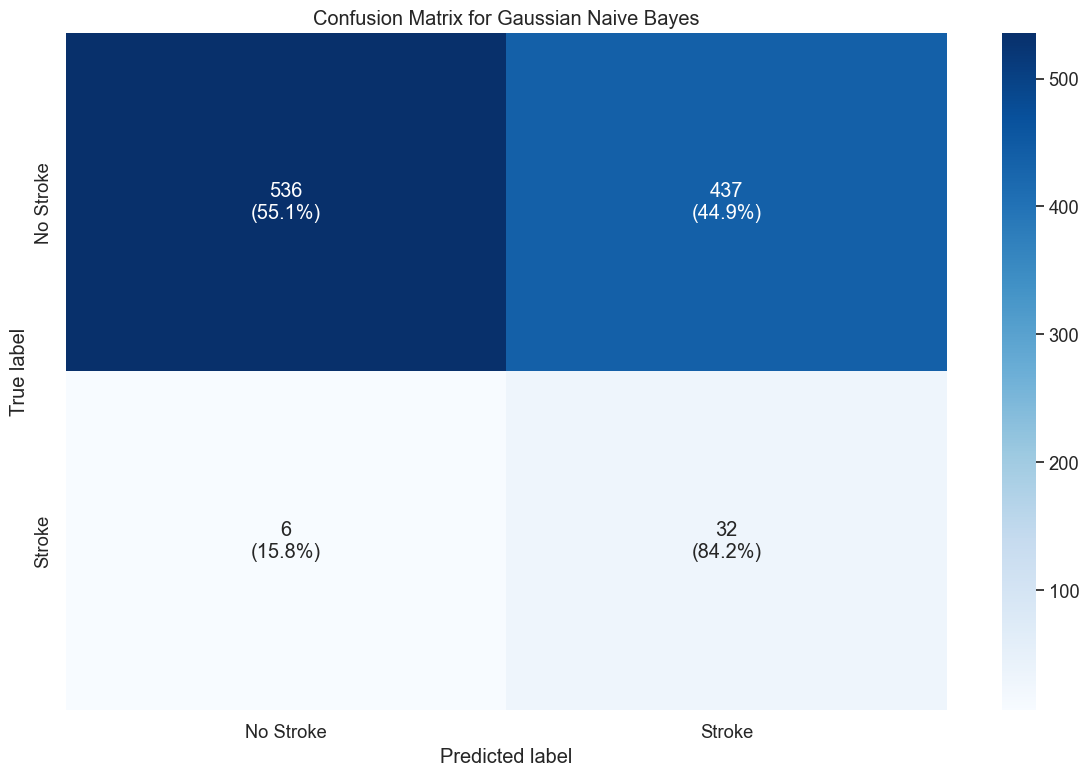

In [48]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = GaussianNB()
classifier.fit(X_train_final, y_train)

y_pred_test = classifier.predict(X_test_final)

print("Test set classification report:")
print(classification_report(y_test, y_pred_test))
print("Test set accuracy score:")
print(accuracy_score(y_test, y_pred_test) * 100)


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm, dtype=object)
for i in range(len(cm)):
    for j in range(len(cm[i])):
        annotations[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])


plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()





In [49]:
# use grid search to improve model performance
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Define the parameter grid for Gaussian Naive Bayes
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Adjust the range and number of values as needed
}

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


grid_search.fit(X_train_final, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")



Best parameters: {'var_smoothing': 0.43287612810830584}
Best cross-validation score: 0.9626


Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score with best parameters:
96.14243323442136


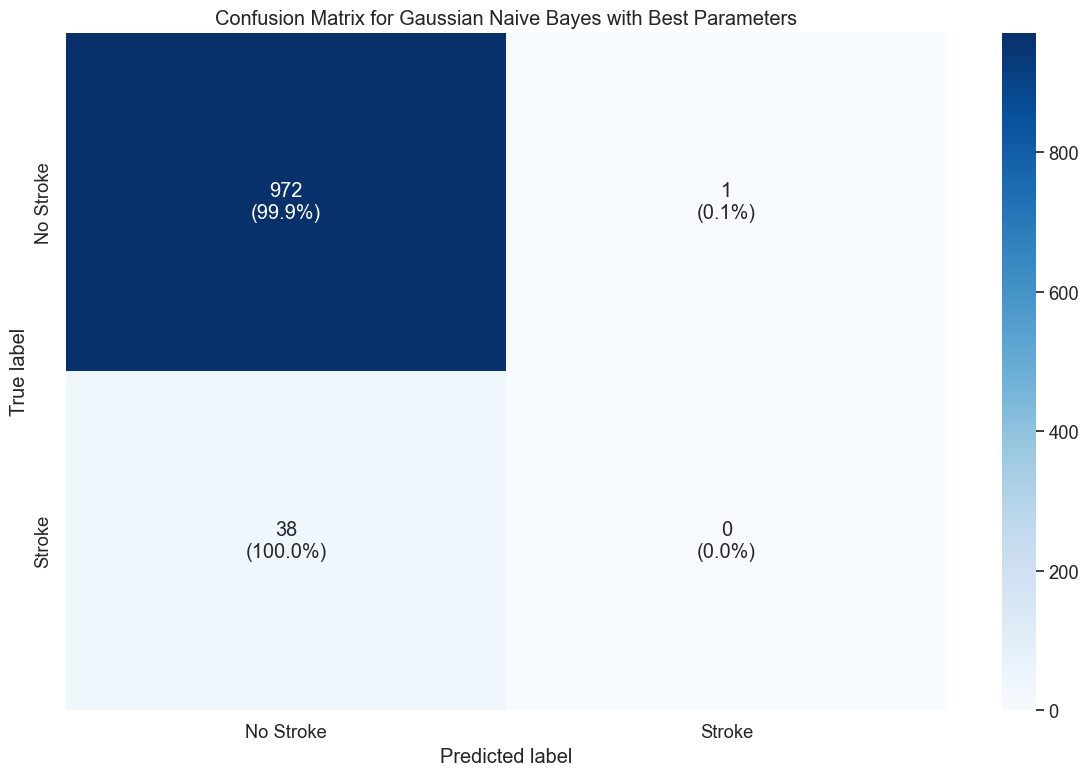

In [50]:
# Train the model with the best parameters
best_gnb = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_gnb.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_best = best_gnb.predict(X_test_final)
# Evaluate the model

print("Test set classification report with best parameters:")
print(classification_report(y_test, y_pred_test_best))
print("Test set accuracy score with best parameters:")
print(accuracy_score(y_test, y_pred_test_best) * 100)
# Plot confusion matrix for the best model  
# Plot confusion matrix for the best model  
cm_best = confusion_matrix(y_test, y_pred_test_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
  for j in range(len(cm_best[i])):
    annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [51]:
# use optuna search to improve model performance
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest a value for var_smoothing
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)
    
    # Create a Gaussian Naive Bayes classifier with the suggested parameter
    gnb = GaussianNB(var_smoothing=var_smoothing)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(gnb, X_train_final, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")


[I 2025-05-01 18:46:19,404] A new study created in memory with name: no-name-1300c156-ccc3-4c40-929f-55f72999aa4b
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_25268\1295054362.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)
[I 2025-05-01 18:46:19,431] Trial 0 finished with value: 0.932866624238567 and parameters: {'var_smoothing': 0.0006053541231119327}. Best is trial 0 with value: 0.932866624238567.
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_25268\1295054362.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)
[I 2025-05-01 

Best parameters from Optuna: {'var_smoothing': 0.09828574300460605}
Best cross-validation score from Optuna: 0.9514


Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       973
           1       0.00      0.00      0.00        38

    accuracy                           0.95      1011
   macro avg       0.48      0.49      0.49      1011
weighted avg       0.93      0.95      0.94      1011

Test set accuracy score with Optuna best parameters:
94.55984174085064


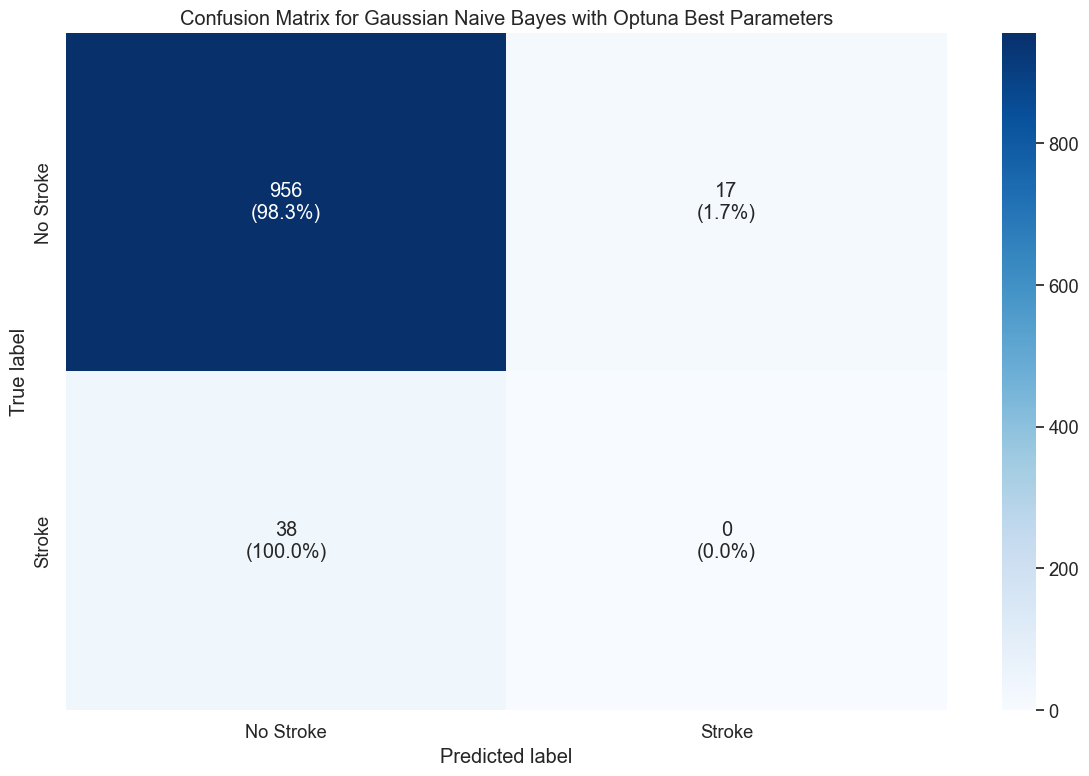

In [52]:
# Train the model with the best parameters from Optuna
best_gnb_optuna = GaussianNB(var_smoothing=best_params_optuna['var_smoothing'])
best_gnb_optuna.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_optuna = best_gnb_optuna.predict(X_test_final)
# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")
print(accuracy_score(y_test, y_pred_test_optuna) * 100)
# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
  for j in range(len(cm_optuna[i])):
    annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_optuna, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with Optuna Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

ROC AUC score: 0.4995


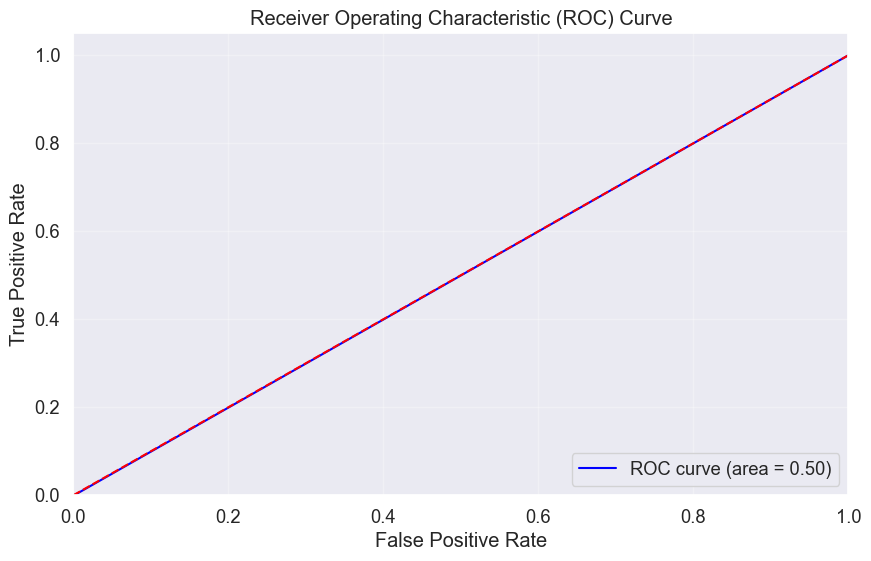

In [53]:
# use roc to improve model performance, keeping in mind that the data is imbalanced where less than 5% of the data is stroke.

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

# Calculate the ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_best)
roc_auc = roc_auc_score(y_test, y_pred_test_best)
print(f"ROC AUC score: {roc_auc:.4f}")
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


Test set classification report with ROC AUC best parameters:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score with ROC AUC best parameters:
96.14243323442136


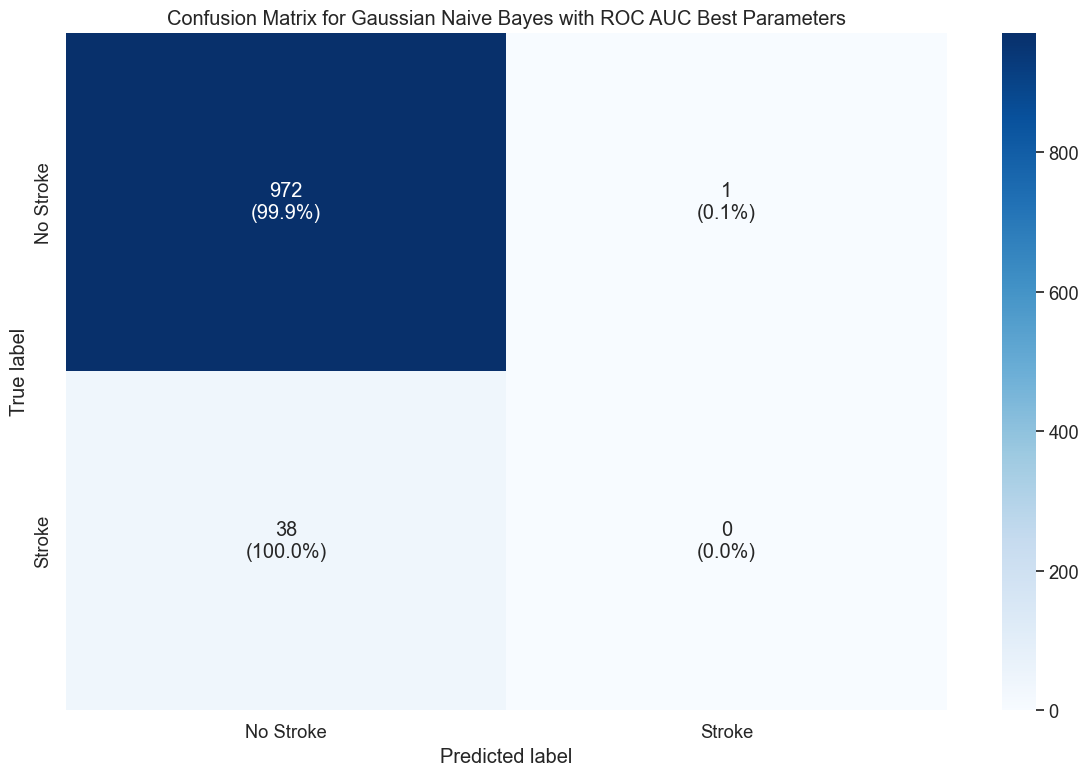

In [54]:
# train the model with the best parameters from roc auc score.

best_gnb_roc = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_gnb_roc.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_roc = best_gnb_roc.predict(X_test_final)
# Evaluate the model
print("Test set classification report with ROC AUC best parameters:")
print(classification_report(y_test, y_pred_test_roc))
print("Test set accuracy score with ROC AUC best parameters:")
print(accuracy_score(y_test, y_pred_test_roc) * 100)
# Plot confusion matrix for the ROC AUC best model
cm_roc = confusion_matrix(y_test, y_pred_test_roc)
cm_percentage = cm_roc.astype('float') / cm_roc.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_roc, dtype=object)
for i in range(len(cm_roc)):
  for j in range(len(cm_roc[i])):
    annotations[i, j] = f"{cm_roc[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_roc, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with ROC AUC Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Training set classification report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62      3110
           1       0.06      0.96      0.12       122

    accuracy                           0.47      3232
   macro avg       0.53      0.71      0.37      3232
weighted avg       0.96      0.47      0.60      3232

Training set accuracy score:
47.12252475247525
Validation set classification report:
              precision    recall  f1-score   support

           0       0.99      0.49      0.65       777
           1       0.07      0.90      0.12        31

    accuracy                           0.50       808
   macro avg       0.53      0.70      0.39       808
weighted avg       0.96      0.50      0.63       808

Validation set accuracy score:
50.37128712871287
Test set classification report:
              precision    recall  f1-score   support

           0       0.99      0.47      0.64       973
           1       0.06      0.92  

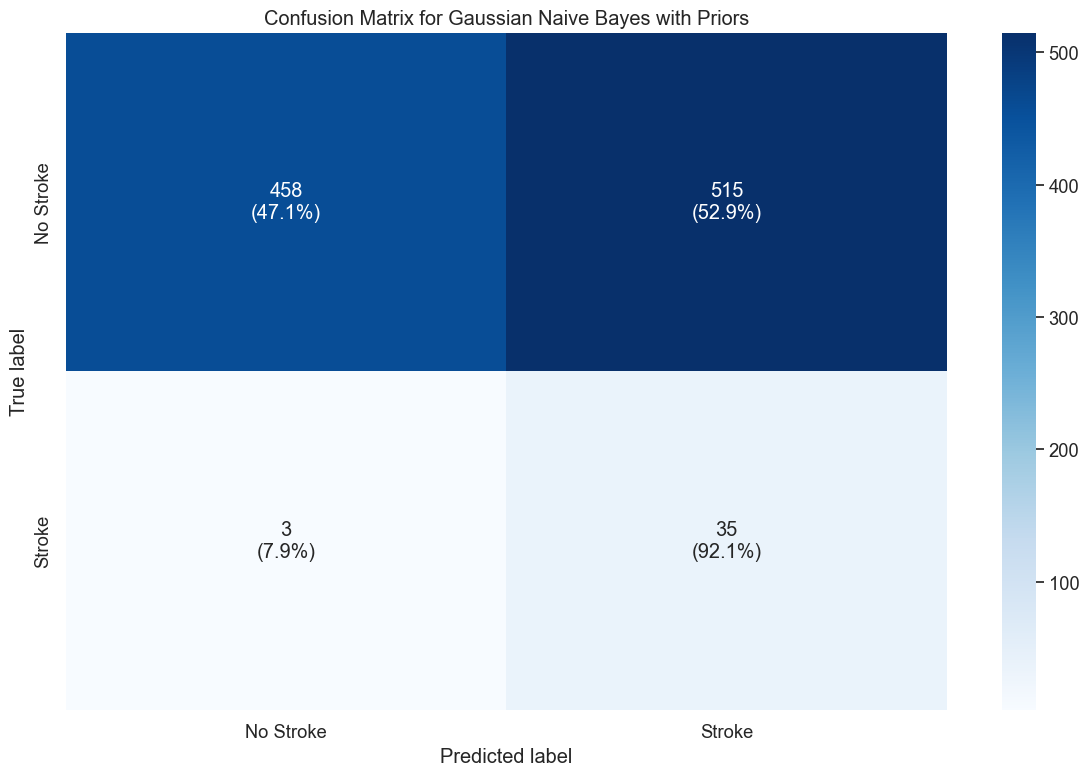

In [55]:
# attempted to use priors to improve the model performance, but it did not work as expected.
model = GaussianNB(priors=[0.9, 0.1])  # [no_stroke, stroke]

model.fit(X_train_final, y_train)
y_pred_train = model.predict(X_train_final)
y_pred_val = model.predict(X_val_final)
y_pred_test = model.predict(X_test_final)
# Evaluate the model on the training set
print("Training set classification report:")
print(classification_report(y_train, y_pred_train))
print("Training set accuracy score:")
print(accuracy_score(y_train, y_pred_train) * 100)
# Evaluate the model on the validation set
print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))
print("Validation set accuracy score:")
print(accuracy_score(y_val, y_pred_val) * 100)
# Evaluate the model on the test set
print("Test set classification report:")
print(classification_report(y_test, y_pred_test))
print("Test set accuracy score:")
print(accuracy_score(y_test, y_pred_test) * 100)
# Plot confusion matrix for the model
cm = confusion_matrix(y_test, y_pred_test)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm, dtype=object)
for i in range(len(cm)):
  for j in range(len(cm[i])):
    annotations[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for Gaussian Naive Bayes with Priors')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


Validation set with adjusted threshold (0.1):
              precision    recall  f1-score   support

           0       0.99      0.36      0.52       777
           1       0.05      0.94      0.10        31

    accuracy                           0.38       808
   macro avg       0.52      0.65      0.31       808
weighted avg       0.96      0.38      0.51       808

Test set with adjusted threshold (0.1):
              precision    recall  f1-score   support

           0       1.00      0.35      0.52       973
           1       0.06      0.97      0.10        38

    accuracy                           0.38      1011
   macro avg       0.53      0.66      0.31      1011
weighted avg       0.96      0.38      0.51      1011



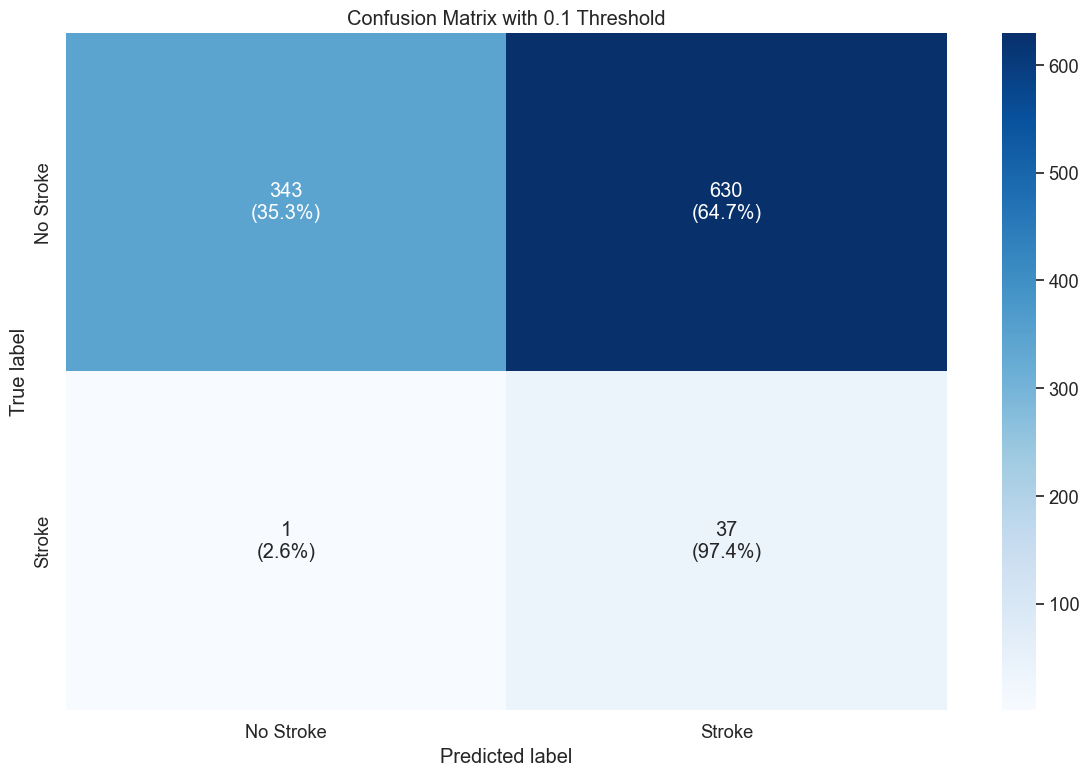

In [56]:
# attempted to Adjust the probability threshold.

# 1. Get probabilities for validation set
y_val_proba = model.predict_proba(X_val_final)

# 2. Apply lower threshold (0.1 instead of default 0.5)
y_val_pred_adjusted = (y_val_proba[:, 1] > 0.1).astype(int)

# 3. Evaluate with the adjusted threshold
print("Validation set with adjusted threshold (0.1):")
print(classification_report(y_val, y_val_pred_adjusted))

# 4. Apply the same threshold to test set
y_test_proba = model.predict_proba(X_test_final)
y_test_pred_adjusted = (y_test_proba[:, 1] > 0.1).astype(int)

# 5. Evaluate test performance with adjusted threshold
print("Test set with adjusted threshold (0.1):")
print(classification_report(y_test, y_test_pred_adjusted))

# 6. Plot confusion matrix with adjusted threshold
cm_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)
cm_percentage = cm_adjusted.astype('float') / cm_adjusted.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_adjusted, dtype=object)
for i in range(len(cm_adjusted)):
  for j in range(len(cm_adjusted[i])):
    annotations[i, j] = f"{cm_adjusted[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_adjusted, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix with 0.1 Threshold')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

SVM(Support Vector Machine)
==========================

Training set classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3110
           1       0.00      0.00      0.00       122

    accuracy                           0.96      3232
   macro avg       0.48      0.50      0.49      3232
weighted avg       0.93      0.96      0.94      3232

Training set accuracy score:
96.22524752475248
Validation set classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       777
           1       0.00      0.00      0.00        31

    accuracy                           0.96       808
   macro avg       0.48      0.50      0.49       808
weighted avg       0.92      0.96      0.94       808

Validation set accuracy score:
96.16336633663366
Test set classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00  

c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\metr

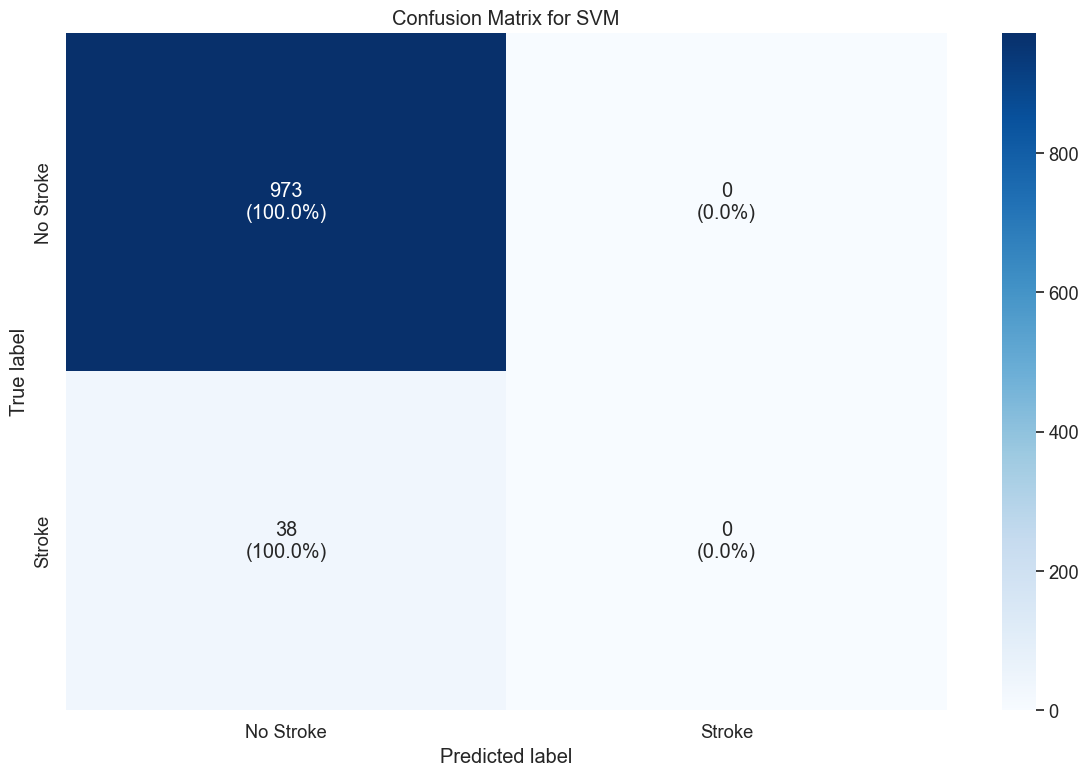

In [57]:
# SVM model bare
#apply svm to the dataset
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#make normal svc better
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_final, y_train)
y_pred_train = svm.predict(X_train_final)
y_pred_val = svm.predict(X_val_final)
y_pred_test = svm.predict(X_test_final)
# Evaluate the model on the training set
print("Training set classification report:")
print(classification_report(y_train, y_pred_train))
print("Training set accuracy score:")
print(accuracy_score(y_train, y_pred_train) * 100)
# Evaluate the model on the validation set
print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))
print("Validation set accuracy score:")
print(accuracy_score(y_val, y_pred_val) * 100)

# Evaluate the model on the test set
print("Test set classification report:")
print(classification_report(y_test, y_pred_test))
print("Test set accuracy score:")
print(accuracy_score(y_test, y_pred_test) * 100)
# Plot confusion matrix for the model
cm = confusion_matrix(y_test, y_pred_test)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm, dtype=object)
for i in range(len(cm)):
  for j in range(len(cm[i])):
    annotations[i, j] = f"{cm[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


Test set classification report with balanced class weights:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       973
           1       0.10      0.76      0.17        38

    accuracy                           0.73      1011
   macro avg       0.54      0.74      0.51      1011
weighted avg       0.95      0.73      0.81      1011

Accuracy: 72.70%


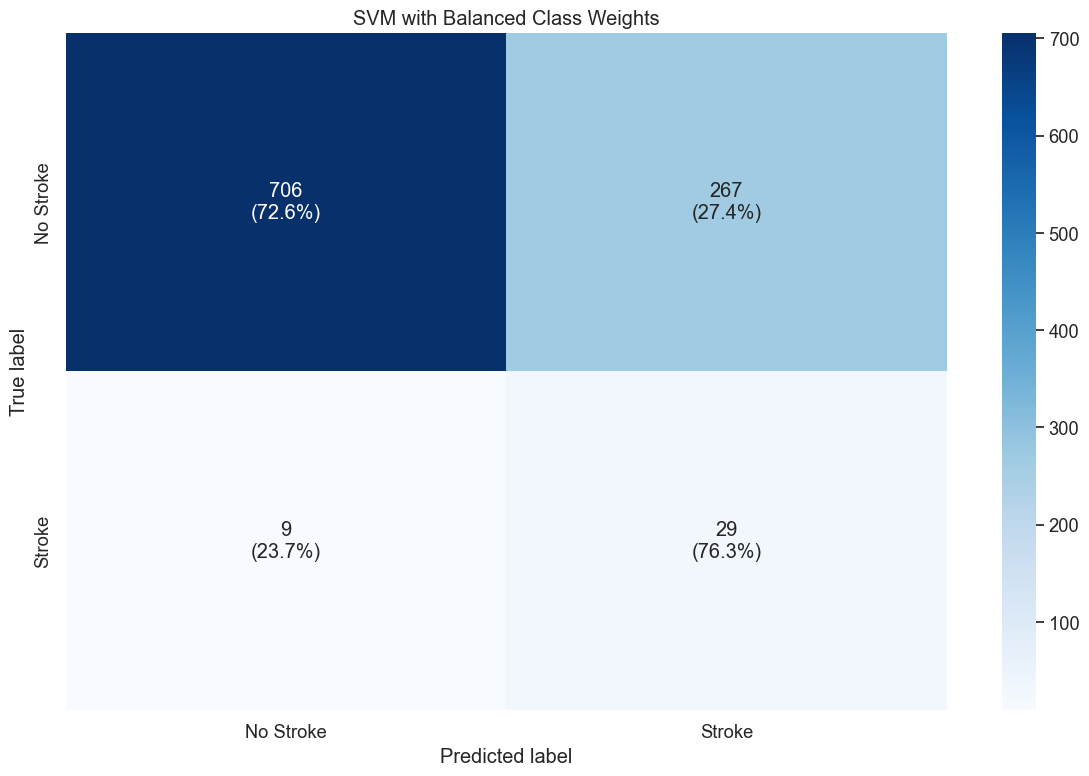

In [58]:
# Use SVC with class_weight='balanced' to handle imbalance
svc_balanced = SVC(class_weight='balanced', probability=True, random_state=42)
svc_balanced.fit(X_train_final, y_train)
y_pred_balanced = svc_balanced.predict(X_test_final)

print("Test set classification report with balanced class weights:")
print(classification_report(y_test, y_pred_balanced))
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced) * 100:.2f}%")

# Plot confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
cm_percentage = cm_balanced.astype('float') / cm_balanced.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_balanced, dtype=object)
for i in range(len(cm_balanced)):
  for j in range(len(cm_balanced[i])):
    annotations[i, j] = f"{cm_balanced[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_balanced, annot=annotations, fmt="", cmap=plt.cm.Blues,
      xticklabels=['No Stroke', 'Stroke'],
      yticklabels=['No Stroke', 'Stroke'])
plt.title('SVM with Balanced Class Weights')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [ ]:
# Use GridSearchCV to find the best parameters for SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

# Create SVC classifier
svc = SVC(probability=True, random_state=42)

# Use f1_score as scoring metric (better for imbalanced data)
scoring = make_scorer(f1_score, average='macro')

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train_final, y_train)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model
best_svc = grid_search.best_estimator_
y_pred_best = best_svc.predict(X_test_final)

print("\nTest set classification report with best parameters:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")

# Plot confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
    for j in range(len(cm_best[i])):
        annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('SVM with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [58]:
# Get probabilities for stroke class
y_prob = best_svc.predict_proba(X_test_final)[:, 1]

# Try different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4]
for threshold in thresholds:
    y_pred_thresh = (y_prob > threshold).astype(int)
    print(f"\nClassification report with threshold {threshold}:")
    print(classification_report(y_test, y_pred_thresh))

NameError: name 'best_svc' is not defined

In [ ]:
#use optuna to find the best parameters for SVC
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score


# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    
    # Create SVC classifier with suggested parameters
    svc = SVC(C=C, kernel=kernel, gamma=gamma, class_weight='balanced', probability=True, random_state=42)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(svc, X_train_final, y_train, cv=5, scoring='accuracy')
    return scores.mean()


# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=28)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")

# Train the model with the best parameters from Optuna
best_svc_optuna = SVC(**best_params_optuna, class_weight='balanced', probability=True, random_state=42)
best_svc_optuna.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_test_optuna = best_svc_optuna.predict(X_test_final)

# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")
print(accuracy_score(y_test, y_pred_test_optuna) * 100)


[I 2025-05-01 18:44:15,325] A new study created in memory with name: no-name-d55d5f7e-7c92-4745-a14f-ba23d4c0530b
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_9552\3334834708.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)


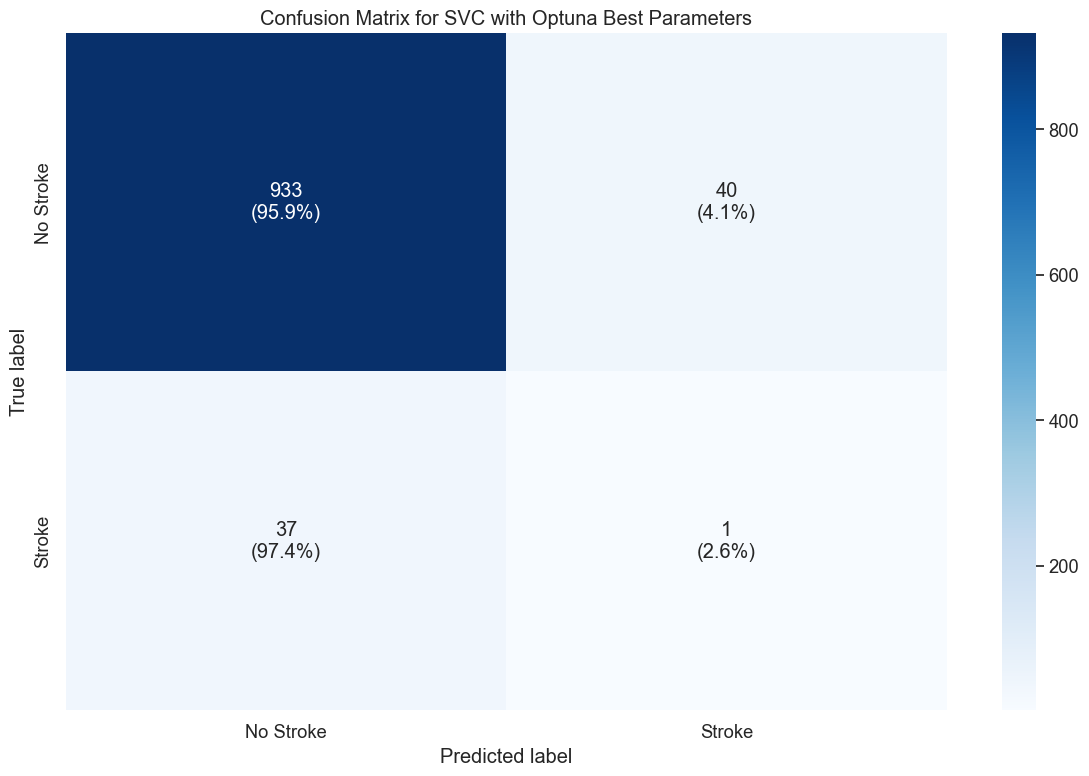

In [ ]:

# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
    for j in range(len(cm_optuna[i])):
        annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_optuna, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])

plt.title('Confusion Matrix for SVC with Optuna Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


K-Nearest Neighbors (KNN)
=========================

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_final, y_train)

KNeighborsClassifier()

Test set classification report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score for KNN:
95.74678536102869


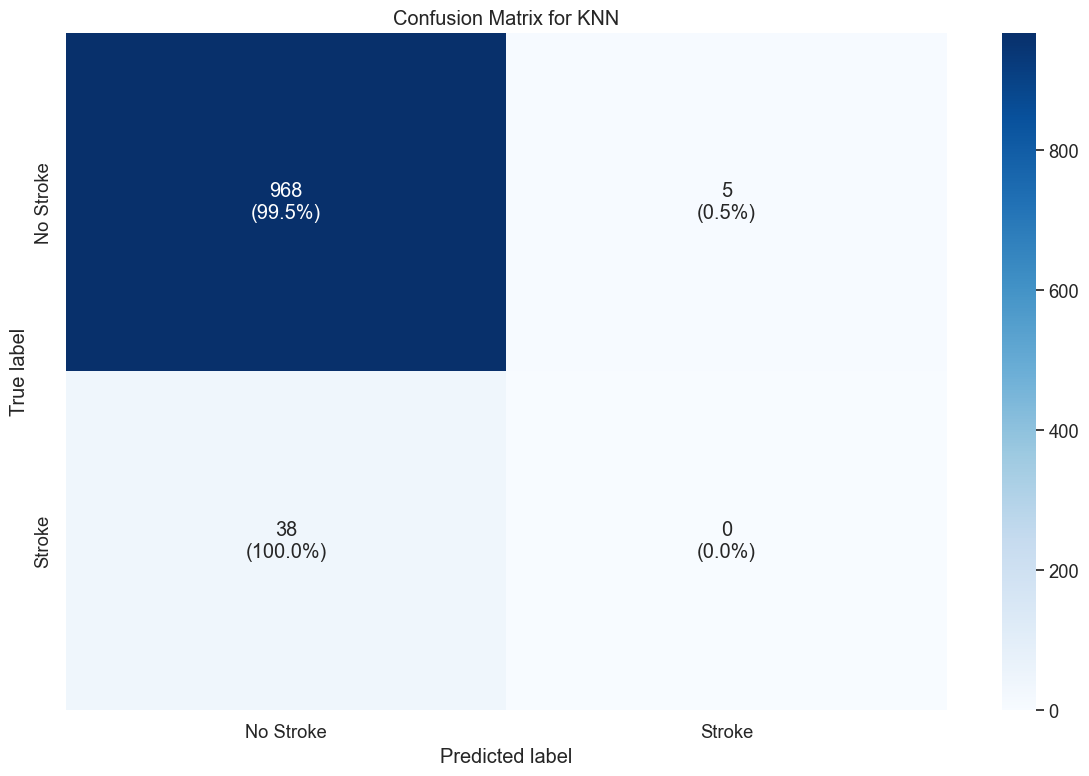

In [60]:
# Make predictions on the test set
y_pred_test_knn = classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for KNN:")
print(classification_report(y_test, y_pred_test_knn))
print("Test set accuracy score for KNN:")
print(accuracy_score(y_test, y_pred_test_knn) * 100)
# Plot confusion matrix for KNN model
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
cm_percentage = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_knn, dtype=object)
for i in range(len(cm_knn)):
    for j in range(len(cm_knn[i])):
        annotations[i, j] = f"{cm_knn[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_knn, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.5284

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.95      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.95      0.94      1011

Accuracy: 95.45%


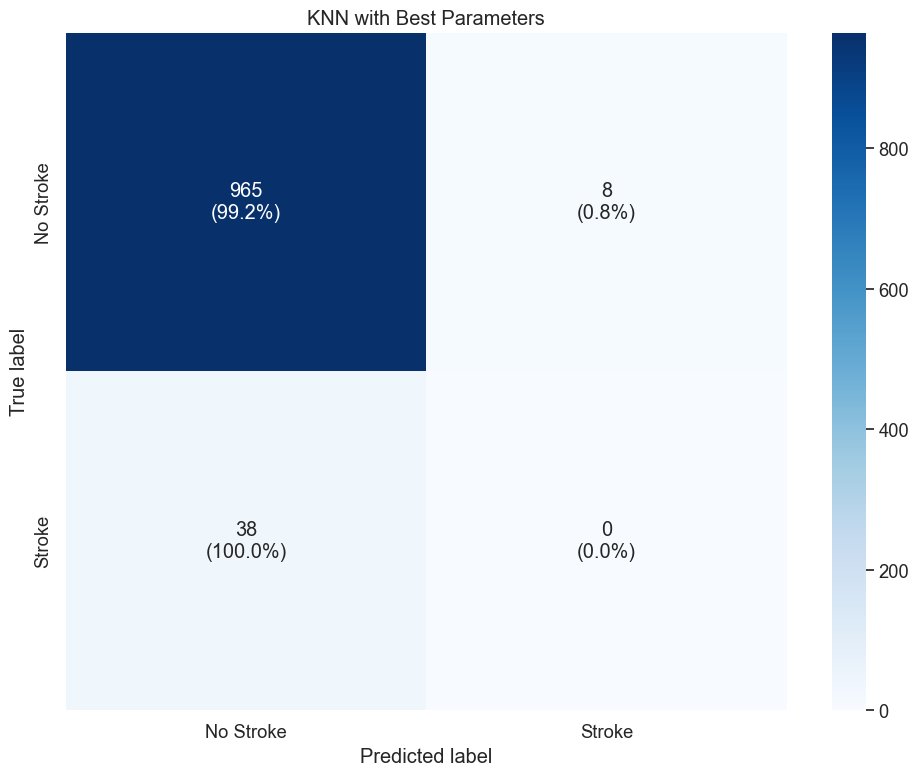

In [62]:
# Define parameter grid for KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use f1_score as scoring metric (better for imbalanced data)
scoring = make_scorer(f1_score, average='macro')

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train_final, y_train)

# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_final)

print("\nTest set classification report with best parameters:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")

# Plot confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
    for j in range(len(cm_best[i])):
        annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"

plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
           xticklabels=['No Stroke', 'Stroke'],
           yticklabels=['No Stroke', 'Stroke'])

plt.title('KNN with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


Classification report with threshold 0.1:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       973
           1       0.05      0.13      0.08        38

    accuracy                           0.88      1011
   macro avg       0.51      0.52      0.51      1011
weighted avg       0.93      0.88      0.90      1011



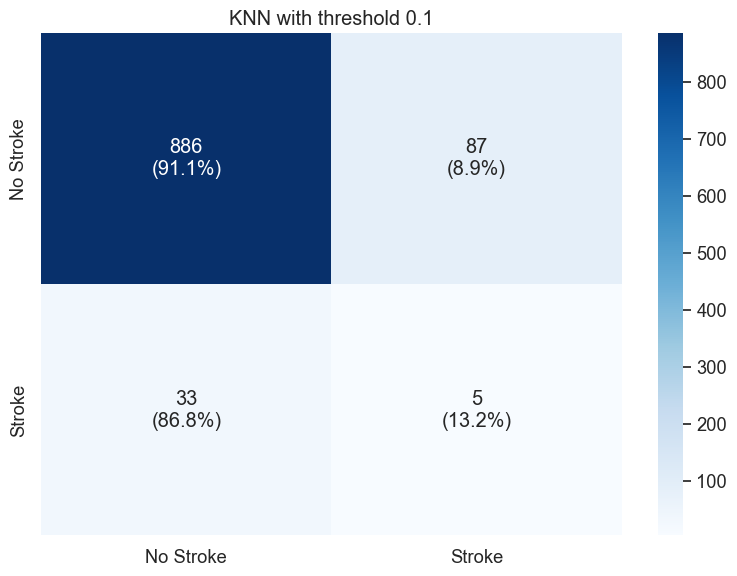


Classification report with threshold 0.2:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       973
           1       0.05      0.13      0.08        38

    accuracy                           0.88      1011
   macro avg       0.51      0.52      0.51      1011
weighted avg       0.93      0.88      0.90      1011



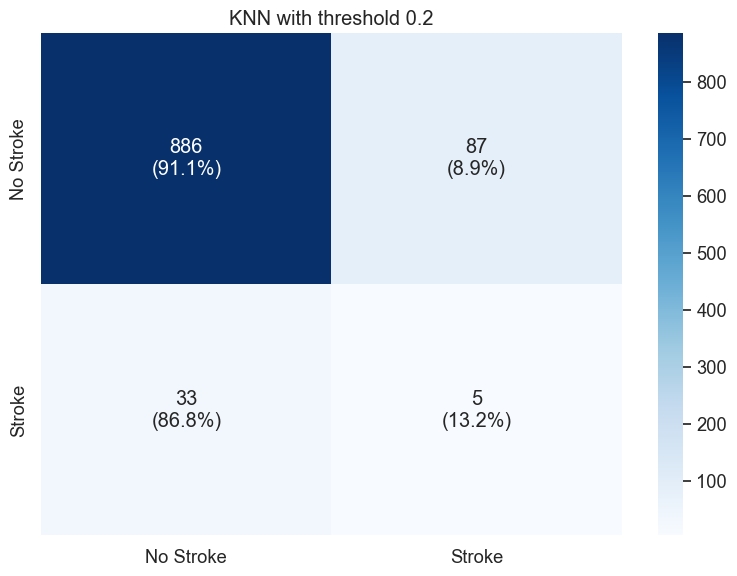


Classification report with threshold 0.3:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       973
           1       0.05      0.13      0.08        38

    accuracy                           0.88      1011
   macro avg       0.51      0.52      0.51      1011
weighted avg       0.93      0.88      0.90      1011



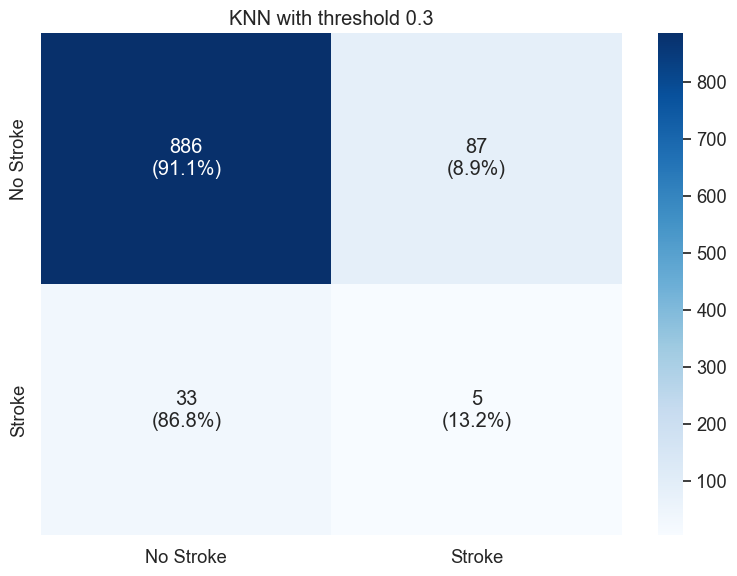


Classification report with threshold 0.4:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.95      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.95      0.94      1011



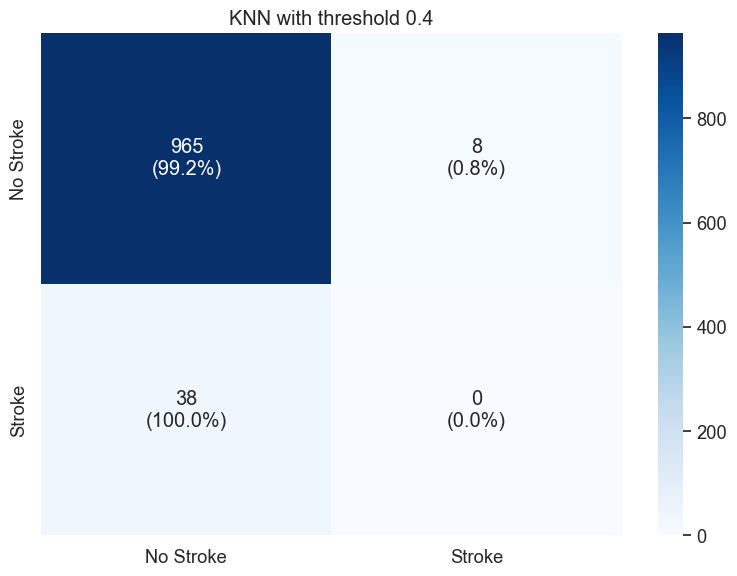

In [63]:
# Adjust probability threshold to improve recall
y_proba = best_knn.predict_proba(X_test_final)[:, 1]

# Try different thresholds to find optimal balance
thresholds = [0.1, 0.2, 0.3, 0.4]
for threshold in thresholds:
    y_pred_thresh = (y_proba > threshold).astype(int)
    print(f"\nClassification report with threshold {threshold}:")
    print(classification_report(y_test, y_pred_thresh))
    
    # Optional: Plot confusion matrix for each threshold
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    cm_percentage = cm_thresh.astype('float') / cm_thresh.sum(axis=1)[:, np.newaxis] * 100
    annotations = np.empty_like(cm_thresh, dtype=object)
    for i in range(len(cm_thresh)):
        for j in range(len(cm_thresh[i])):
            annotations[i, j] = f"{cm_thresh[i, j]}\n({cm_percentage[i, j]:.1f}%)"

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_thresh, annot=annotations, fmt="", cmap=plt.cm.Blues,
               xticklabels=['No Stroke', 'Stroke'],
               yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'KNN with threshold {threshold}')
    plt.tight_layout()
    plt.show()

In [64]:
# Grid search specifically optimized for recall
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Create a recall scorer specifically for the positive class (stroke)
recall_scorer = make_scorer(recall_score, pos_label=1)

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # p=1 for manhattan, p=2 for euclidean
}

# Create GridSearchCV optimized for recall
grid_search_recall = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=recall_scorer,  # Focus on recall
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on SMOTE-balanced data
grid_search_recall.fit(X_train_final, y_train)

print(f"Best parameters for recall: {grid_search_recall.best_params_}")
print(f"Best recall score: {grid_search_recall.best_score_:.4f}")

# Evaluate best model
best_knn_recall = grid_search_recall.best_estimator_
y_pred_best_recall = best_knn_recall.predict(X_test_final)
print(classification_report(y_test, y_pred_best_recall))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters for recall: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best recall score: 0.0573
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011



In [65]:
# Create a custom weighted F1 scorer that prioritizes stroke cases
from sklearn.metrics import fbeta_score, make_scorer

# Create weighted F1 scorer (beta=2 puts more emphasis on recall than precision)
# The average='binary' and pos_label=1 ensures we focus on the stroke class
def stroke_weighted_f1(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, pos_label=1, average='binary')

weighted_stroke_scorer = make_scorer(stroke_weighted_f1)

# Grid search with custom scorer
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [3, 5, 7, 9, 13, 17],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    scoring=weighted_stroke_scorer,  # Custom scorer
    cv=5,
    n_jobs=-1
)

# Fit on the SMOTE-balanced data
grid_search.fit(X_train_final, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_final)
print("\nTest set classification report with weighted F1 optimization:")
print(classification_report(y_test, y_pred_best))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

Test set classification report with weighted F1 optimization:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.95      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.95      0.94      1011



Test set classification report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score for KNN:
95.74678536102869


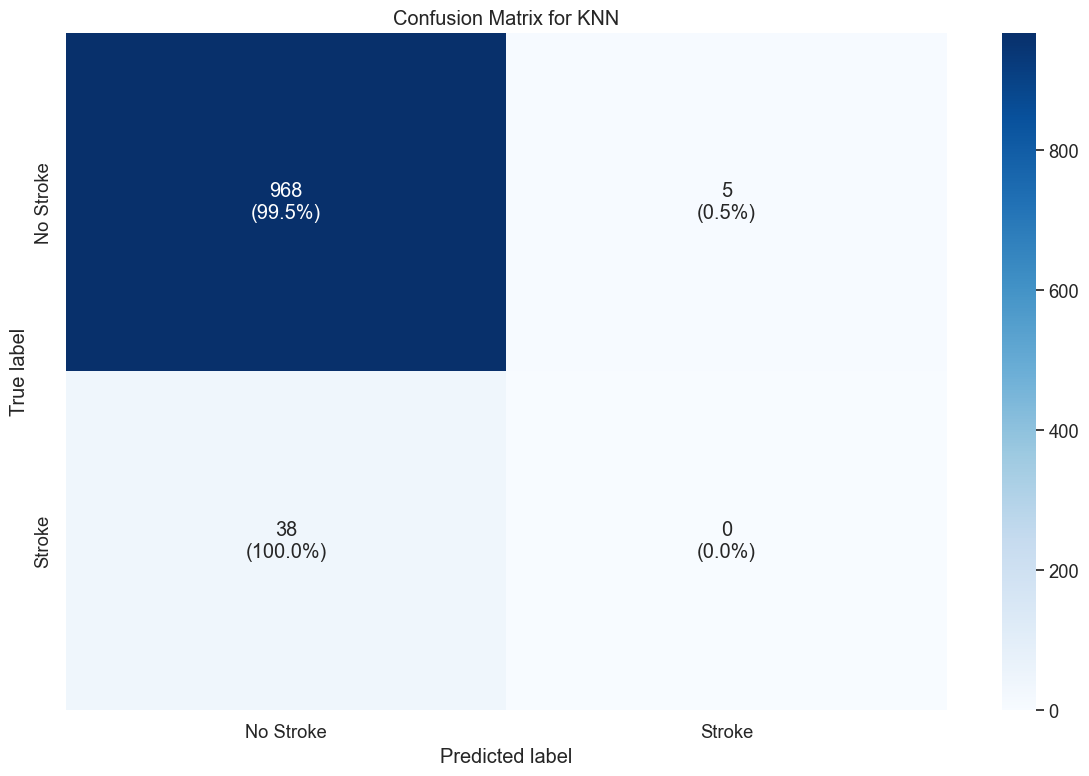

In [66]:
# Make predictions on the test set
y_pred_test_knn = classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for KNN:")
print(classification_report(y_test, y_pred_test_knn))
print("Test set accuracy score for KNN:")
print(accuracy_score(y_test, y_pred_test_knn) * 100)
# Plot confusion matrix for KNN model
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
cm_percentage = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_knn, dtype=object)
for i in range(len(cm_knn)):
    for j in range(len(cm_knn[i])):
        annotations[i, j] = f"{cm_knn[i, j]}\n({cm_percentage[i, j]:.1f}%)"

sns.heatmap(cm_knn, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


[I 2025-05-01 18:48:28,494] A new study created in memory with name: no-name-e46038e7-2837-44a4-bf7e-aea370c811bc


[I 2025-05-01 18:48:28,567] Trial 0 finished with value: 0.4960785049244901 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'p': 1}. Best is trial 0 with value: 0.4960785049244901.
[I 2025-05-01 18:48:28,697] Trial 1 finished with value: 0.5034692577593567 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'metric': 'minkowski', 'p': 1}. Best is trial 1 with value: 0.5034692577593567.
[I 2025-05-01 18:48:28,844] Trial 2 finished with value: 0.4903816562384251 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'metric': 'minkowski', 'p': 2}. Best is trial 1 with value: 0.5034692577593567.
[I 2025-05-01 18:48:28,981] Trial 3 finished with value: 0.4903816562384251 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'metric': 'minkowski', 'p': 2}. Best is trial 1 with value: 0.5034692577593567.
[I 2025-05-01 18:48:29,114] Trial 4 finished with value: 0.5272973920967018 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'm

Best parameters from Optuna: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'euclidean', 'p': 1}
Best cross-validation score from Optuna: 0.5565
Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       973
           1       0.11      0.08      0.09        38

    accuracy                           0.94      1011
   macro avg       0.54      0.53      0.53      1011
weighted avg       0.93      0.94      0.94      1011

Test set accuracy score with Optuna best parameters:
94.16419386745795


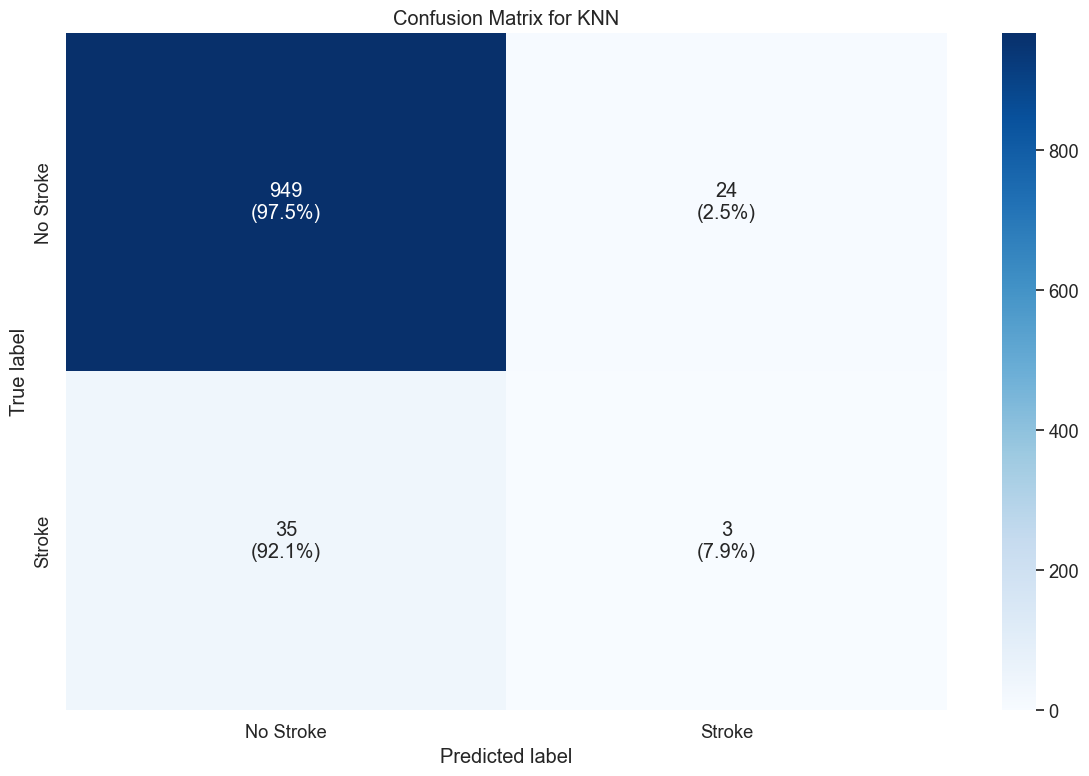

In [67]:
#Using Optuna to find the best parameters for KNN
import optuna
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, make_scorer


from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    p = trial.suggest_int('p', 1, 2)  # 1 for manhattan, 2 for euclidean
    # Create KNeighborsClassifier with suggested parameters
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)

    # Perform cross-validation and return the mean accuracy
    # scores = cross_val_score(knn, X_train_final, y_train, cv=5, scoring='accuracy')
    # return scores.mean()
    scores = cross_val_score(knn, X_train_final, y_train, cv=5, scoring='f1_macro')
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")

# Train the model with the best parameters from Optuna
best_knn_optuna = KNeighborsClassifier(**best_params_optuna)
best_knn_optuna.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_optuna = best_knn_optuna.predict(X_test_final)
# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")

print(accuracy_score(y_test, y_pred_test_optuna) * 100)
# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
    for j in range(len(cm_optuna[i])):
        annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"



sns.heatmap(cm_knn, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


XGBoost
 ==============

Note: you may need to restart the kernel to use updated packages.


c:\Users\Ahmed\anaconda3\lib\site-packages\xgboost\training.py:183: UserWarning: [18:48:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test set classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       973
           1       0.08      0.03      0.04        38

    accuracy                           0.95      1011
   macro avg       0.52      0.51      0.51      1011
weighted avg       0.93      0.95      0.94      1011

Test set accuracy score for XGBoost:
95.25222551928783


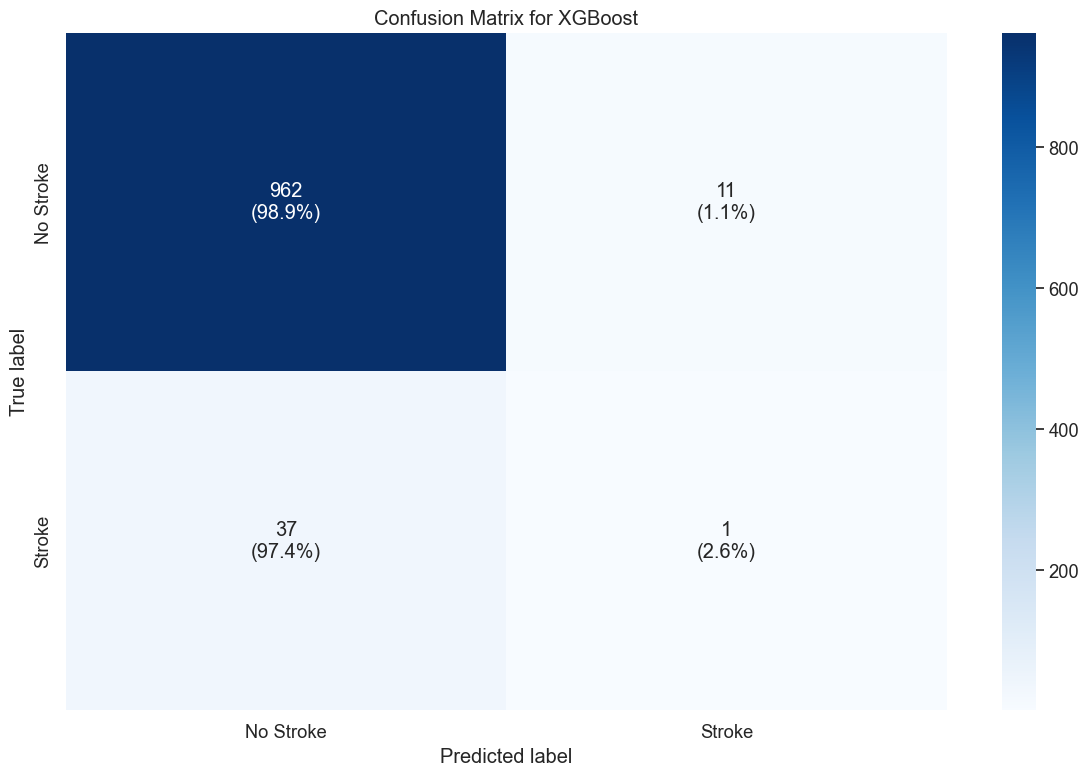

In [68]:
#Using XGBoost
%pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Create an XGBoost classifier

xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Fit the model on the training data
xgb_classifier.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_xgb = xgb_classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))
print("Test set accuracy score for XGBoost:")
print(accuracy_score(y_test, y_pred_test_xgb) * 100)
# Plot confusion matrix for XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
cm_percentage = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis] * 100

annotations = np.empty_like(cm_xgb, dtype=object)
for i in range(len(cm_xgb)):
    for j in range(len(cm_xgb[i])):
        annotations[i, j] = f"{cm_xgb[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_xgb, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()


 Decision Trees
 =============

Test set classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       973
           1       0.05      0.05      0.05        38

    accuracy                           0.93      1011
   macro avg       0.51      0.51      0.51      1011
weighted avg       0.93      0.93      0.93      1011

Test set accuracy score for Decision Tree:
92.97725024727993


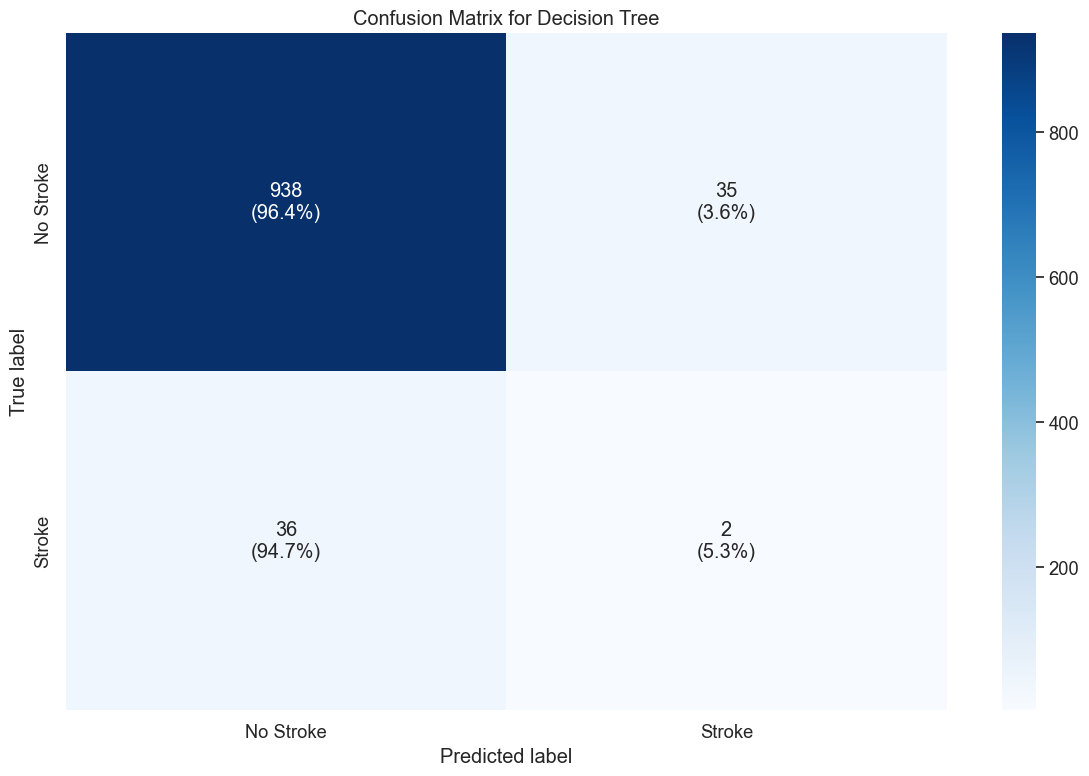

In [69]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Fit the model on the training data
dt_classifier.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_dt = dt_classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for Decision Tree:")
print(classification_report(y_test, y_pred_test_dt))

print("Test set accuracy score for Decision Tree:")
print(accuracy_score(y_test, y_pred_test_dt) * 100)
# Plot confusion matrix for Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_test_dt)

cm_percentage = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_dt, dtype=object)
for i in range(len(cm_dt)):
    for j in range(len(cm_dt[i])):
        annotations[i, j] = f"{cm_dt[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_dt, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.5713

Test set classification report with best parameters:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       973
           1       0.14      0.26      0.18        38

    accuracy                           0.91      1011
   macro avg       0.56      0.60      0.57      1011
weighted avg       0.94      0.91      0.92      1011

Accuracy: 91.20%


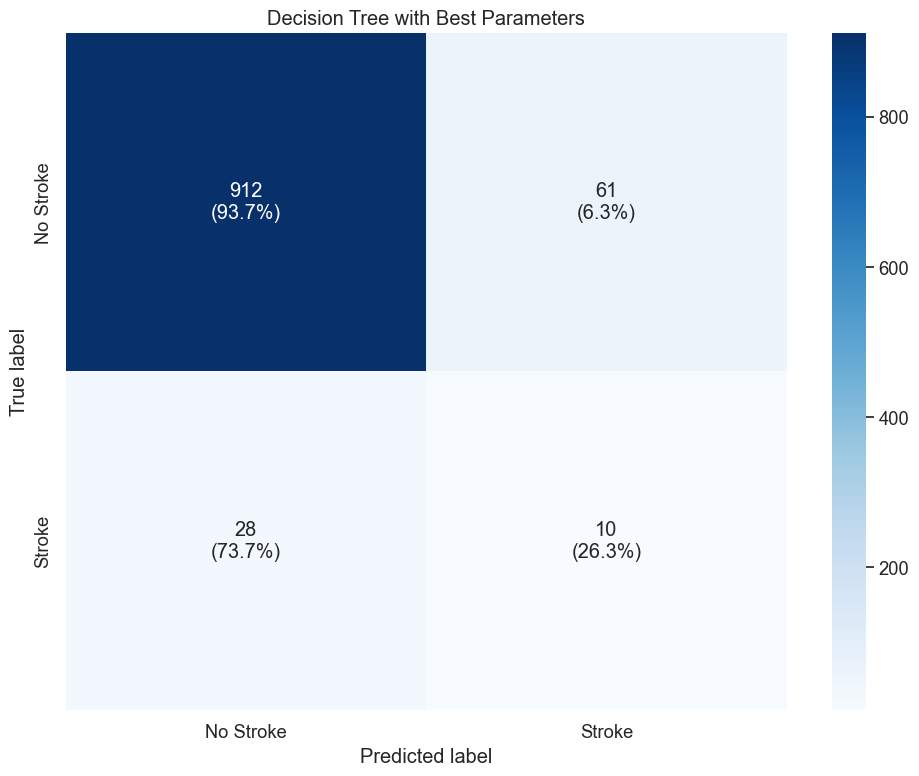

In [70]:
#using grid search to find the best parameters for Decision Tree




from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, f1_score, recall_score

# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Create Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
# Use f1_score as scoring metric (better for imbalanced data)
scoring = make_scorer(f1_score, average='macro')
# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit the grid search
grid_search.fit(X_train_final, y_train)
# Print best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
# Evaluate the best model
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test_final)
print("\nTest set classification report with best parameters:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
# Plot confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
cm_percentage = cm_best.astype('float') / cm_best.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_best, dtype=object)
for i in range(len(cm_best)):
    for j in range(len(cm_best[i])):
        annotations[i, j] = f"{cm_best[i, j]}\n({cm_percentage[i, j]:.1f}%)"
plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Decision Tree with Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

[I 2025-05-01 18:49:05,693] A new study created in memory with name: no-name-56a12f1c-1b26-4891-b38c-f49e78463d41
[I 2025-05-01 18:49:05,744] Trial 0 finished with value: 0.46212743556269886 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 1, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.46212743556269886.
[I 2025-05-01 18:49:05,798] Trial 1 finished with value: 0.5511537651189331 and parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'class_weight': None}. Best is trial 1 with value: 0.5511537651189331.
[I 2025-05-01 18:49:05,849] Trial 2 finished with value: 0.4887200004952799 and parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 2, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.5511537651189331.
[I 2025-05-01 18:49:05,903] Trial 3 finished with value: 0.5539089469799194 and parameters: {'criterion': 'entropy', 'max

Best parameters from Optuna: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 4, 'class_weight': 'balanced'}
Best cross-validation score from Optuna: 0.5766
Test set classification report with Optuna best parameters:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       973
           1       0.11      0.29      0.16        38

    accuracy                           0.88      1011
   macro avg       0.54      0.60      0.55      1011
weighted avg       0.94      0.88      0.91      1011

Test set accuracy score with Optuna best parameters:
88.22947576656776


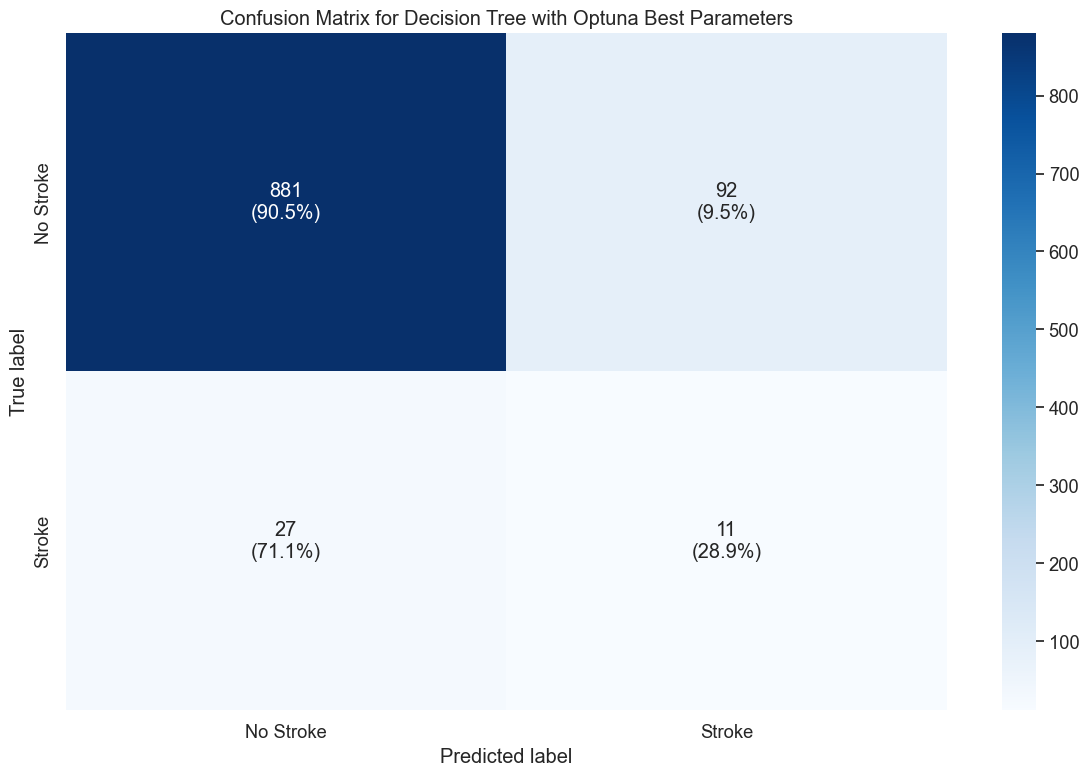

In [71]:
#using Optuna to find the best parameters for Decision Tree
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import make_scorer, fbeta_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    
    # Create Decision Tree classifier with suggested parameters
    dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 class_weight=class_weight, random_state=42)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(dt, X_train_final, y_train, cv=5, scoring='f1_macro')
    return scores.mean()
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
# Get the best parameters and score
best_params_optuna = study.best_params
best_score_optuna = study.best_value
print(f"Best parameters from Optuna: {best_params_optuna}")
print(f"Best cross-validation score from Optuna: {best_score_optuna:.4f}")
# Train the model with the best parameters from Optuna
best_dt_optuna = DecisionTreeClassifier(**best_params_optuna, random_state=42)
best_dt_optuna.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_optuna = best_dt_optuna.predict(X_test_final)
# Evaluate the model
print("Test set classification report with Optuna best parameters:")
print(classification_report(y_test, y_pred_test_optuna))
print("Test set accuracy score with Optuna best parameters:")
print(accuracy_score(y_test, y_pred_test_optuna) * 100)
# Plot confusion matrix for the Optuna best model
cm_optuna = confusion_matrix(y_test, y_pred_test_optuna)
cm_percentage = cm_optuna.astype('float') / cm_optuna.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_optuna, dtype=object)
for i in range(len(cm_optuna)):
    for j in range(len(cm_optuna[i])):
        annotations[i, j] = f"{cm_optuna[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_optuna, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Decision Tree with Optuna Best Parameters')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()




Random Forest
============

Test set classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       973
           1       0.00      0.00      0.00        38

    accuracy                           0.96      1011
   macro avg       0.48      0.50      0.49      1011
weighted avg       0.93      0.96      0.94      1011

Test set accuracy score for Random Forest:
96.24134520276954


c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


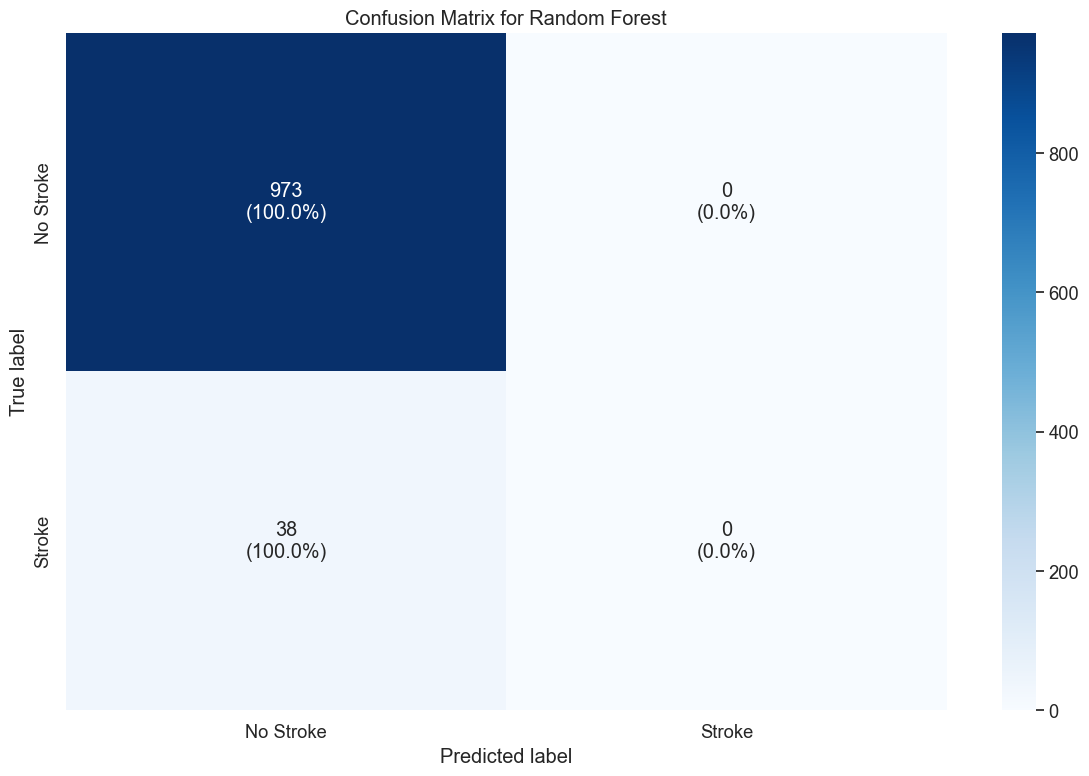

In [72]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Fit the model on the training data
rf_classifier.fit(X_train_final, y_train)
# Make predictions on the test set
y_pred_test_rf = rf_classifier.predict(X_test_final)
# Evaluate the model
print("Test set classification report for Random Forest:")
print(classification_report(y_test, y_pred_test_rf))
print("Test set accuracy score for Random Forest:")
print(accuracy_score(y_test, y_pred_test_rf) * 100)
# Plot confusion matrix for Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_test_rf)
cm_percentage = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] * 100
annotations = np.empty_like(cm_rf, dtype=object)
for i in range(len(cm_rf)):
    for j in range(len(cm_rf[i])):
        annotations[i, j] = f"{cm_rf[i, j]}\n({cm_percentage[i, j]:.1f}%)"
sns.heatmap(cm_rf, annot=annotations, fmt="", cmap=plt.cm.Blues,
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Clustering Analysis 
===================